# Estudo sobre a relação 'receita' e 'orçamento' de bilheterias do cinema

### Objetivo

Um grande aplicativo de streaming que não pode revelar seu nome, solicitou um modelo para a previsão das receitas de seus futuros filmes que seja baseado no valor do orçamento previsto para a produção. 

#### Data Source

https://www.kaggle.com/juzershakir/tmdb-movies-dataset

Investigating Dataset contains information about 10k+ movies collected from IMDb.

Valores utilizados em Milhões (USD).



# Análise Detalhada

## Import Libraries

In [1]:
import pandas as pd

from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 O volume na unidade C é OS
 O Número de Série do Volume é D822-8AF4

 Pasta de C:\Users\erick\IronHack\new_folder\Project 3\archive

11/12/2021  11:54    <DIR>          .
04/12/2021  14:58    <DIR>          ..
25/11/2021  21:14    <DIR>          .ipynb_checkpoints
23/11/2021  21:34         6.853.035 tmdb_movies_data.csv
11/12/2021  11:54         3.108.842 Untitled.ipynb
25/11/2021  21:04           185.568 walt_disney_movies.csv
               3 arquivo(s)     10.147.445 bytes
               3 pasta(s)   146.440.396.800 bytes disponíveis


# Import 'df_movies'

In [3]:
df_movies = pd.read_csv('tmdb_movies_data.csv')

In [4]:
# df_disney = pd.read_csv('walt_disney_movies.csv')

# Cleaning and exploring dataset

Para ter uma visão mais limpa dos dados a serem trabalhados, foi realizada uma primeira limpeza de colunas desnecessárias.

In [5]:
df_movies = df_movies.drop(columns=['id'])
df_movies = df_movies.drop(columns=['imdb_id'])
#df_movies = df_movies.drop(columns=['popularity'])
df_movies = df_movies.drop(columns=['cast'])
df_movies = df_movies.drop(columns=['homepage'])
df_movies = df_movies.drop(columns=['director'])
df_movies = df_movies.drop(columns=['tagline'])
df_movies = df_movies.drop(columns=['budget_adj'])
df_movies = df_movies.drop(columns=['revenue_adj'])
df_movies = df_movies.drop(columns=['keywords'])
df_movies = df_movies.drop(columns=['overview'])
df_movies = df_movies.drop(columns=['release_date'])
#df_movies = df_movies.drop(columns=['release_year'])

In [6]:
df_movies

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,Bruce Brown Films,11,7.4,1966
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966


In [7]:
df_ppt = df_movies

## Checking information

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


In [9]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


A primeira observação dos dados já nos da a impressão de grande dispersão dos dados e que existem valores que não poderão serem utilizados por serem outliers extremos ou dados que não condizem com a realidade.

In [10]:
df_movies['budget'].head(10)

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
5    135000000
6    155000000
7    108000000
8     74000000
9    175000000
Name: budget, dtype: int64

In [11]:
df_movies['revenue'].head(10)

0    1513528810
1     378436354
2     295238201
3    2068178225
4    1506249360
5     532950503
6     440603537
7     595380321
8    1156730962
9     853708609
Name: revenue, dtype: int64

## Checking null()

In [12]:
df_movies['budget'].isnull().value_counts()

False    10866
Name: budget, dtype: int64

In [13]:
df_movies['revenue'].isnull().value_counts()

False    10866
Name: revenue, dtype: int64

In [14]:
df_movies['genres'].isnull().value_counts()

False    10843
True        23
Name: genres, dtype: int64

### Drop 'budget' > 0

In [15]:
filtro  = df_movies['budget'] > 0

In [16]:
df_movies = df_movies[filtro]

In [17]:
df_movies['budget'].value_counts().head(5)

20000000    190
15000000    183
25000000    178
10000000    176
30000000    165
Name: budget, dtype: int64

### Drop 'revenue' > 0

In [18]:
filtro2  = df_movies['revenue'] > 0

In [19]:
df_movies = df_movies[filtro2]

In [20]:
df_movies['revenue'].value_counts().head(5)

12000000    7
11000000    5
5000000     5
2000000     5
10000000    5
Name: revenue, dtype: int64

In [21]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3855 non-null   float64
 1   budget                3855 non-null   int64  
 2   revenue               3855 non-null   int64  
 3   original_title        3855 non-null   object 
 4   runtime               3855 non-null   int64  
 5   genres                3855 non-null   object 
 6   production_companies  3809 non-null   object 
 7   vote_count            3855 non-null   int64  
 8   vote_average          3855 non-null   float64
 9   release_year          3855 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 331.3+ KB


In [22]:
df_movies['budget'].value_counts().head(5)

25000000    154
15000000    148
20000000    146
30000000    139
40000000    121
Name: budget, dtype: int64

# Final Version: 'df_movies'

In [23]:
df_movies.head(5)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


# Checkin movies 'genres'

In [24]:
df_movies['genres'].value_counts(25)

Drama                              0.063554
Comedy                             0.060441
Drama|Romance                      0.027756
Comedy|Romance                     0.026978
Comedy|Drama|Romance               0.023606
                                     ...   
Fantasy|Animation|Family|Comedy    0.000259
Romance|Adventure|Drama            0.000259
Drama|Comedy|Thriller              0.000259
Adventure|Western                  0.000259
Romance|Comedy|Family|Fantasy      0.000259
Name: genres, Length: 1053, dtype: float64

# Checking Production_companies

## Production Companies checking

In [25]:
df_movies['production_companies'] = df_movies['production_companies'].fillna(value= 'N')

In [26]:
df_movies.sort_values('production_companies').tail(100)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
104,1.532997,30000000,49263404,Entourage,104,Comedy,Warner Bros.|Closest to the Hole Productions,364,6.2,2015
8919,0.441852,8000000,21028755,Creepshow,120,Horror|Comedy|Fantasy,Warner Bros.|Creepshow Films Inc.|Laurel Enter...,90,6.7,1982
7924,0.504848,25000000,38348988,City Heat,93,Action|Comedy|Crime,Warner Bros.|Deliverance Productions|Malpaso C...,24,5.2,1984
7992,1.263139,39000000,75800000,Superman III,125,Comedy|Action|Adventure|Fantasy|Science Fiction,Warner Bros.|Dovemead Films|Cantharus Productions,239,4.7,1983
7315,1.285924,54000000,108185706,Superman II,127,Action|Adventure|Fantasy|Science Fiction,Warner Bros.|Dovemead Films|Film Export A.G.,319,6.3,1980
...,...,...,...,...,...,...,...,...,...,...
3296,0.127310,15000000,317000,The Yellow Handkerchief,102,Drama|Romance,area japan,30,6.6,2008
10777,0.439210,11,11,F.I.S.T.,145,Drama|Action,chateau productions,13,6.7,1978
5661,0.476673,100000,444098,Upstream Color,96,Drama|Science Fiction,erbp,163,6.5,2013
2202,0.315527,4000000,55125,Dirty Girl,90,Drama|Comedy,iDeal Partners Film Fund,36,6.2,2010


In [27]:
df_movies['production_companies'] = df_movies['production_companies'].map(lambda y: y.split('|')[0])

In [28]:
var = 'Universal Pictures'

In [29]:
df_movies['production_companies'].value_counts()

Universal Pictures                        283
Paramount Pictures                        266
Columbia Pictures                         177
Twentieth Century Fox Film Corporation    164
New Line Cinema                           144
                                         ... 
Walt Disney Studios Motion Pictures         1
Mockingbird Pictures                        1
21 Laps Entertainment                       1
Fastnet Films                               1
Lonely Film Productions GmbH & Co. KG.      1
Name: production_companies, Length: 895, dtype: int64

In [30]:
df_movies['production_companies'].unique()

array(['Universal Studios', 'Village Roadshow Pictures',
       'Summit Entertainment', 'Lucasfilm', 'Universal Pictures',
       'Regency Enterprises', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Walt Disney Pictures',
       'Columbia Pictures', 'DNA Films', 'Marvel Studios',
       'Double Feature Films', 'Studio Babelsberg', 'Escape Artists',
       'New Line Cinema', 'Focus Features', 'Participant Media',
       'Gotham Group', 'DreamWorks SKG', 'Element Pictures',
       'Vertigo Entertainment', 'Wildgaze Films', 'Davis Entertainment',
       'Lakeshore Entertainment', 'Bazelevs Production',
       'Fox 2000 Pictures', 'Haut et Court', 'Killer Films',
       'Waverly Films', 'Endgame Entertainment', 'Lionsgate',
       'Pretty Pictures', 'Parts and Labor', 'Kramer & Sigman Films',
       'Imagine Entertainment', 'Entertainment One',
       'Working Title Films', 'Warner Bros.', 'Blue Sky Studios',
       'Sony Pictures', 'Universum Film (UFA)', 'TriSta

In [31]:
var.split('|')

['Universal Pictures']

## Movies genres cleaning

In [32]:
df_movies['genres'] = df_movies['genres'].map(lambda x: x.split('|')[0])

In [33]:
df_movies['genres'].value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

In [34]:
df_movies['genres'] = df_movies['genres'].replace('History', 'Drama')
df_movies['genres'] = df_movies['genres'].replace('Music', 'Fantasy')
df_movies['genres'] = df_movies['genres'].replace('Family', 'Romance')
df_movies['genres'] = df_movies['genres'].replace('Western', 'Adventure')
df_movies['genres'] = df_movies['genres'].replace('War', 'Thriller')
df_movies['genres'] = df_movies['genres'].replace('Mystery', 'Horror')

## Final genres

In [35]:
indexNames = df_movies[ df_movies['genres'] == 'TV Movie' ].index
df_movies.drop(indexNames , inplace=True)

indexNames = df_movies[ df_movies['genres'] == 'Documentary' ].index
df_movies.drop(indexNames , inplace=True)
df_movies['genres'].value_counts()

Drama              907
Comedy             787
Action             689
Adventure          330
Horror             311
Thriller           180
Crime              172
Fantasy            139
Romance            106
Animation          103
Science Fiction     98
Name: genres, dtype: int64

In [36]:
df_movies.budget.describe()

count    3.822000e+03
mean     3.748435e+07
std      4.227149e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [37]:
df_movies[ df_movies['original_title'] == "National Lampoon's Loaded Weapon 1"]

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
10297,0.490013,8,27,National Lampoon's Loaded Weapon 1,84,Comedy,New Line Cinema,72,5.5,1993


## Budget and Revenues ($ Milions)

In [38]:
x = 1000000
df_movies['revenue'] = df_movies['revenue'] / x

In [39]:
x = 1000000
df_movies['budget'] = df_movies['budget'] / x

In [40]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000
mean,1.199191,37.484352,108.397794,109.281790,531.586866,6.163919,2001.235479
std,1.478777,42.271487,177.080944,19.921893,882.590636,0.793027,11.307740
min,0.010335,0.000001,0.000002,15.000000,10.000000,2.200000,1960.000000
25%,0.467309,10.000000,13.821511,96.000000,72.000000,5.700000,1995.000000
50%,0.804415,24.000000,45.595450,106.000000,206.500000,6.200000,2004.000000
75%,1.380330,50.000000,125.456119,119.000000,583.000000,6.700000,2010.000000
max,32.985763,425.000000,2781.505847,338.000000,9767.000000,8.400000,2015.000000


In [41]:
df_movies

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150.000,1513.528810,Jurassic World,124,Action,Universal Studios,5562,6.5,2015
1,28.419936,150.000,378.436354,Mad Max: Fury Road,120,Action,Village Roadshow Pictures,6185,7.1,2015
2,13.112507,110.000,295.238201,Insurgent,119,Adventure,Summit Entertainment,2480,6.3,2015
3,11.173104,200.000,2068.178225,Star Wars: The Force Awakens,136,Action,Lucasfilm,5292,7.5,2015
4,9.335014,190.000,1506.249360,Furious 7,137,Action,Universal Pictures,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7.500,33.736689,Who's Afraid of Virginia Woolf?,131,Drama,Chenault Productions,74,7.5,1966
10828,0.402730,3.000,13.000000,Torn Curtain,128,Horror,Universal Pictures,46,6.3,1966
10829,0.395668,4.653,6.000000,El Dorado,120,Action,Paramount Pictures,36,6.9,1966
10835,0.299911,12.000,20.000000,The Sand Pebbles,182,Action,Twentieth Century Fox Film Corporation,28,7.0,1966


### Drop 'budget' <  1 Mil USD

In [42]:
filtro3  = df_movies['budget'] > 0.001

### Drop 'revenue' <  1 Mil USD

In [43]:
filtro4  = df_movies['revenue'] > 0.001

In [44]:
df_movies = df_movies[filtro3]

In [45]:
df_movies = df_movies[filtro4]

In [46]:
df_movies.sort_values('revenue').head(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
4668,0.321712,1.5,0.001938,Best Man Down,90,Comedy,KODA Entertainment,39,5.9,2012
4611,0.402086,12.0,0.002521,The Samaritan,90,Thriller,Quickfire Films,27,4.7,2012
4495,0.704291,2.5,0.003003,About Cherry,102,Drama,Gordon Bijelonic / Datari Turner Films,58,4.4,2012
4591,0.436617,3.0,0.003010,ATM,90,Horror,Buffalo Gal Pictures,105,5.5,2012
3621,0.434506,2.5,0.003358,Nuit Blanche,98,Action,Procirep,28,5.9,2011
7602,0.405537,20.0,0.003561,Death Defying Acts,97,Drama,BBC Films,31,5.4,2007
3752,0.244803,6.0,0.005206,The Good Doctor,93,Drama,N,28,4.8,2011
5704,0.387592,7.0,0.006147,Sweetwater,95,Adventure,Kickstart Productions,41,5.7,2013
5586,0.744520,25.0,0.006399,The Adventurer: The Curse of the Midas Box,99,Fantasy,Matador Pictures,49,5.2,2013
6948,0.040915,1.0,0.007202,Special,81,Drama,Rival Pictures,13,6.5,2006


## Cheking statistics (Revenue)

In [47]:
df_movies.revenue.describe()

count    3787.000000
mean      109.366798
std       177.599524
min         0.001938
25%        14.409461
50%        46.396427
75%       127.145580
max      2781.505847
Name: revenue, dtype: float64

## Cheking statistics (Budget)

In [48]:
df_movies.budget.describe()

count    3787.000000
mean       37.747450
std        42.325143
min         0.007000
25%        10.000000
50%        25.000000
75%        50.000000
max       425.000000
Name: budget, dtype: float64

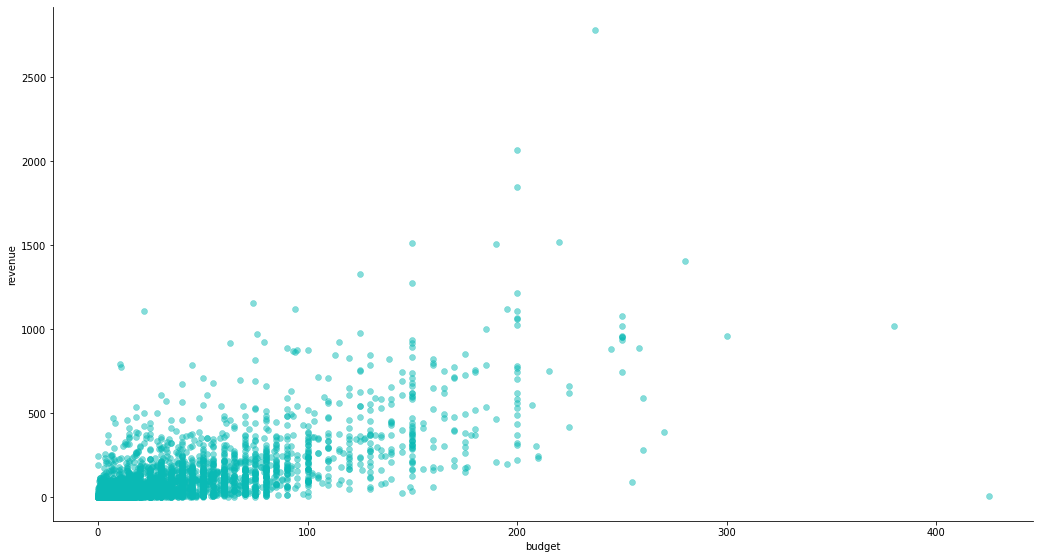

In [49]:
%matplotlib inline
plot = sns.relplot(data=df_movies, y='revenue', x='budget', edgecolor=None, alpha=0.5, color='#0ABAB5')
plot.fig.set_size_inches(16,8)

In [50]:
corr = df_movies.corr()
corr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.443319,0.613834,0.213339,0.779075,0.323957,0.175726
budget,0.443319,1.000000,0.687605,0.260221,0.554624,0.026029,0.271423
revenue,0.613834,0.687605,1.000000,0.249594,0.753642,0.231854,0.140532
runtime,0.213339,0.260221,0.249594,1.000000,0.273779,0.361842,-0.111812
vote_count,0.779075,0.554624,0.753642,0.273779,1.000000,0.393805,0.209270
vote_average,0.323957,0.026029,0.231854,0.361842,0.393805,1.000000,-0.137626
release_year,0.175726,0.271423,0.140532,-0.111812,0.209270,-0.137626,1.000000


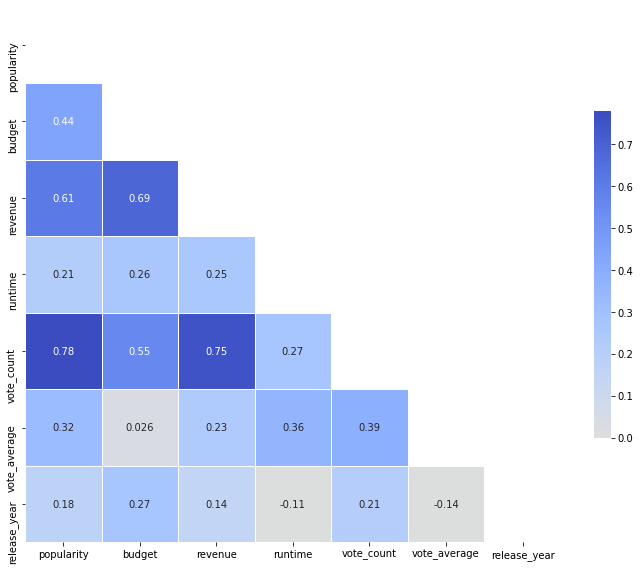

In [51]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm_r",
    vmin=0.0,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
);

## Checking corr

In [52]:
df_movies.corr()['revenue'].sort_values(ascending=False)

revenue         1.000000
vote_count      0.753642
budget          0.687605
popularity      0.613834
runtime         0.249594
vote_average    0.231854
release_year    0.140532
Name: revenue, dtype: float64

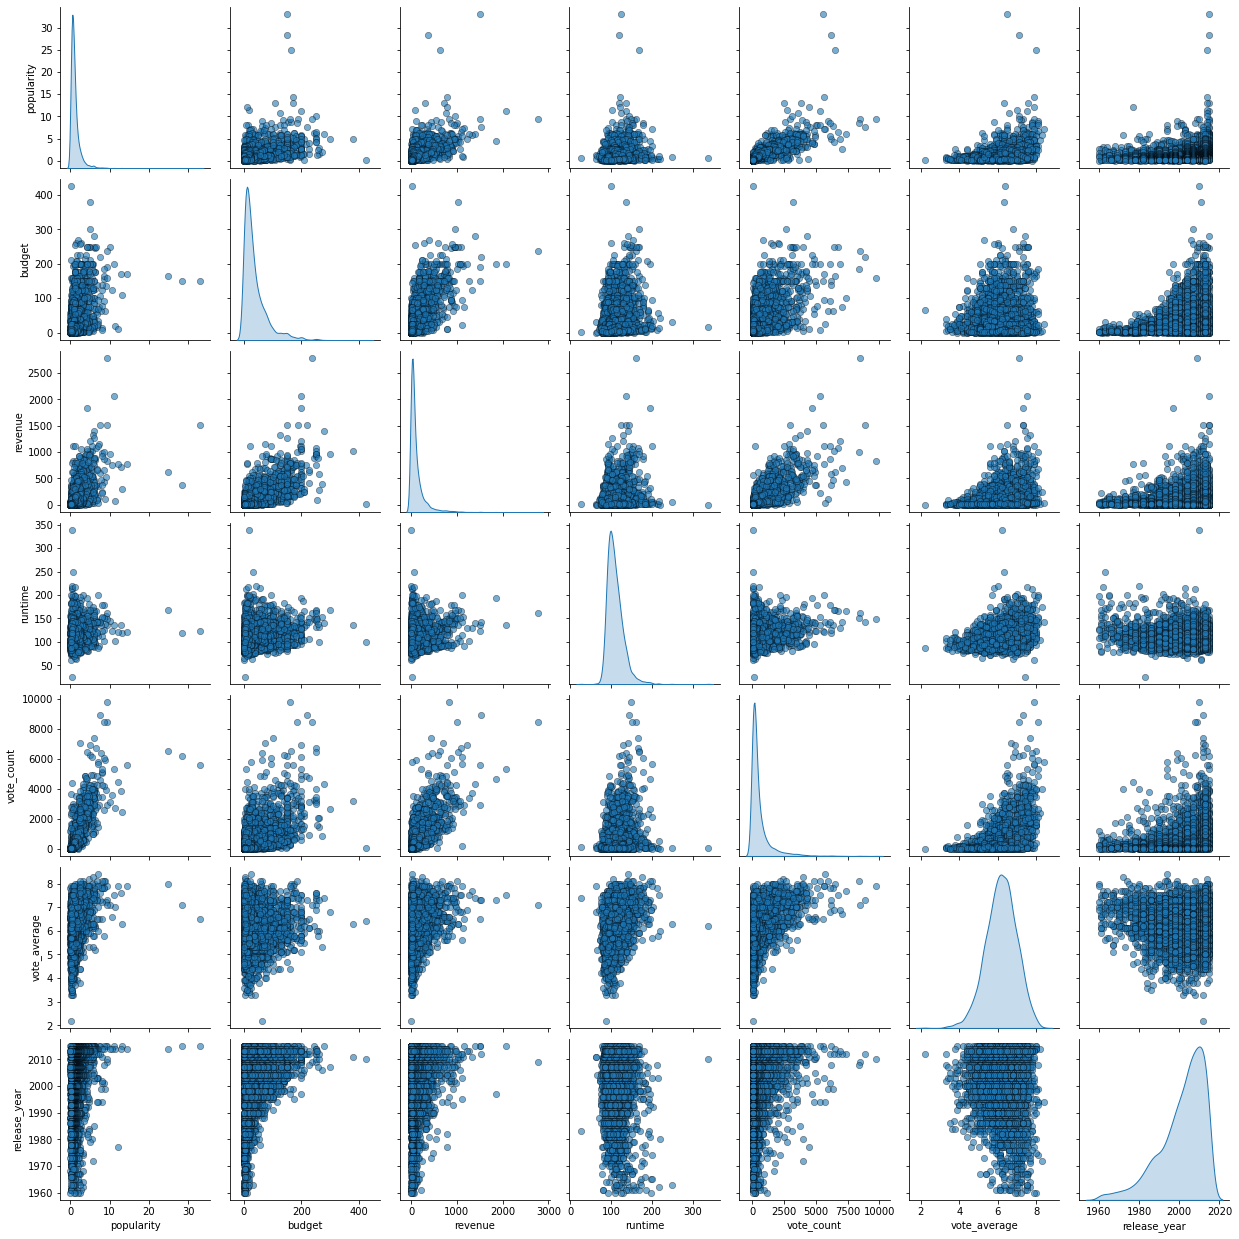

In [53]:
sns.pairplot(
    df_movies, diag_kind="kde", plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"}
);

In [54]:
df_movies.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

# 'Revenue' distribuition

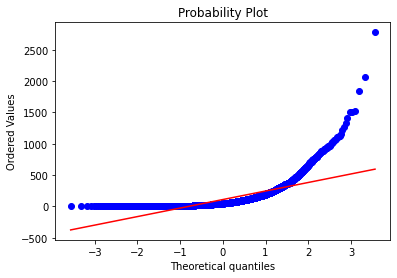

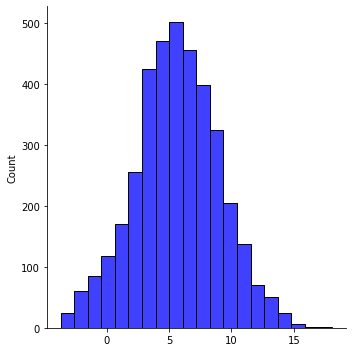

In [55]:
fig, ax = plt.subplots()

stats.probplot(df_movies['revenue'], plot=ax)
sns.displot(boxcox(df_movies["revenue"])[0], color='blue', bins=20, kde=False)

## 'Revenue' distribuition - Log base(e)

In [56]:
df_movies["revenue_log"] = np.log(df_movies["revenue"])
df_movies["budget_log"] = np.log(df_movies["budget"])

((array([-3.56343516, -3.32364867, -3.191257  , ...,  3.191257  ,
          3.32364867,  3.56343516]),
  array([-6.24609877, -5.98309963, -5.80814349, ...,  7.52025309,
          7.63442341,  7.93074773])),
 (1.8763170117539625, 3.5419799272589314, 0.9610663753152662))

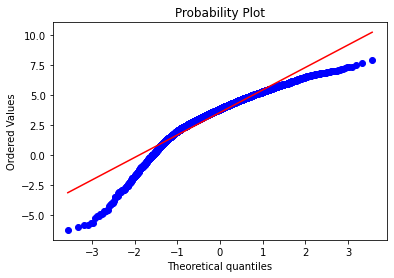

In [57]:
fig, ax = plt.subplots()

stats.probplot(df_movies['revenue_log'], plot=ax)

## 'Revenue' distribuition - Log(2)

In [58]:
df_movies["revenue_log2"] = np.log2(df_movies["revenue"])
df_movies["budget_log2"] = np.log2(df_movies["budget"])

((array([-3.56343516, -3.32364867, -3.191257  , ...,  3.191257  ,
          3.32364867,  3.56343516]),
  array([-9.01121571, -8.63178817, -8.37937981, ..., 10.84943183,
         11.0141448 , 11.44165042])),
 (2.70695324799304, 5.109996875984711, 0.9610663753152661))

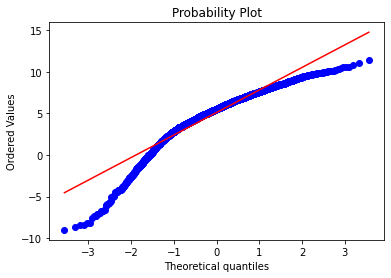

In [59]:
fig, ax = plt.subplots()

stats.probplot(df_movies['revenue_log2'], plot=ax)

## 'Revenue' distribuition - Boxcox

In [60]:
df_movies["revenue_boxcox"], lambda_revenue = boxcox(df_movies["revenue"])
df_movies["budget_boxcox"] = boxcox(df_movies["budget"])[0]


In [61]:
lambda_revenue

0.1852815697964548

In [62]:
boxcox(df_movies["revenue"])
boxcox(df_movies["budget"])

(array([9.31342566, 9.31342566, 8.38268874, ..., 1.83887749, 3.33513076,
        1.97437852]),
 0.22627667819335176)

((array([-3.56343516, -3.32364867, -3.191257  , ...,  3.191257  ,
          3.32364867,  3.56343516]),
  array([-3.70064962, -3.6159317 , -3.55724407, ..., 16.34474466,
         16.80956511, 18.06288321])),
 (3.3815384541797147, 5.615455710335816, 0.9992277982611307))

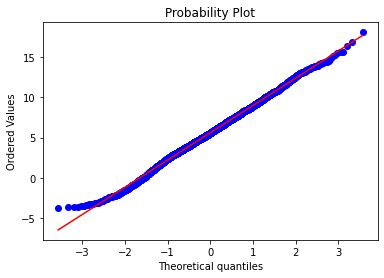

In [63]:
fig, ax = plt.subplots()

stats.probplot(df_movies['revenue_boxcox'], plot=ax)

# 'Budget' distribuition

((array([-3.56343516, -3.32364867, -3.191257  , ...,  3.191257  ,
          3.32364867,  3.56343516]),
  array([7.00e-03, 8.00e-03, 1.00e-02, ..., 3.00e+02, 3.80e+02, 4.25e+02])),
 (36.87732308161422, 37.74745002746237, 0.8706561475350537))

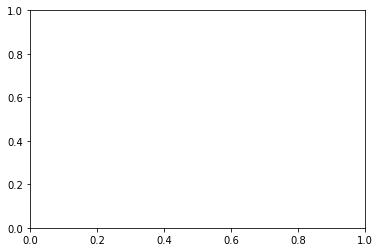

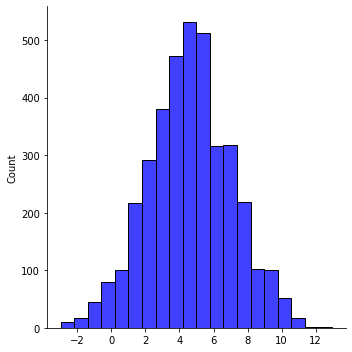

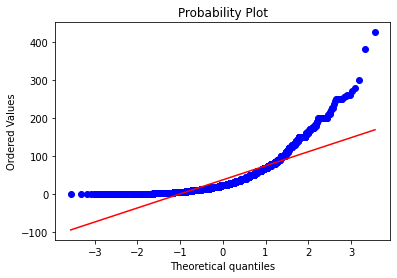

In [64]:
fig, axis = plt.subplots()

stats.probplot(df_movies['budget'], plot=ax)
sns.displot(boxcox(df_movies["budget"])[0], color='blue', bins=20, kde=False)

fig, ax = plt.subplots()

stats.probplot(df_movies['budget'], plot=ax)

## 'Budget' distribuition - Boxcox

((array([-3.56343516, -3.32364867, -3.191257  , ...,  3.191257  ,
          3.32364867,  3.56343516]),
  array([-2.98137746, -2.93726544, -2.86050934, ..., 11.64541871,
         12.52810919, 12.96277473])),
 (2.4534384083814587, 4.632838484801127, 0.9993921727914852))

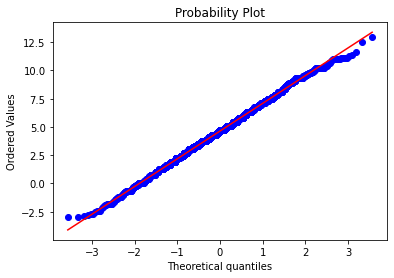

In [65]:
fig, ax = plt.subplots()

stats.probplot(df_movies['budget_boxcox'], plot=ax)

## Correlation check

In [66]:
corr = df_movies.corr()
corr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox
popularity,1.000000,0.443319,0.613834,0.213339,0.779075,0.323957,0.175726,0.423409,0.322539,0.423409,0.322539,0.511033,0.374816
budget,0.443319,1.000000,0.687605,0.260221,0.554624,0.026029,0.271423,0.542966,0.751072,0.542966,0.751072,0.638731,0.869545
revenue,0.613834,0.687605,1.000000,0.249594,0.753642,0.231854,0.140532,0.614179,0.475600,0.614179,0.475600,0.765768,0.562744
runtime,0.213339,0.260221,0.249594,1.000000,0.273779,0.361842,-0.111812,0.228700,0.272149,0.228700,0.272149,0.250707,0.279673
vote_count,0.779075,0.554624,0.753642,0.273779,1.000000,0.393805,0.209270,0.488397,0.378359,0.488397,0.378359,0.602365,0.449068
vote_average,0.323957,0.026029,0.231854,0.361842,0.393805,1.000000,-0.137626,0.223378,-0.041338,0.223378,-0.041338,0.239508,-0.027457
release_year,0.175726,0.271423,0.140532,-0.111812,0.209270,-0.137626,1.000000,0.023339,0.286096,0.023339,0.286096,0.078473,0.306519
revenue_log,0.423409,0.542966,0.614179,0.228700,0.488397,0.223378,0.023339,1.000000,0.603661,1.000000,0.603661,0.962651,0.626266
budget_log,0.322539,0.751072,0.475600,0.272149,0.378359,-0.041338,0.286096,0.603661,1.000000,0.603661,1.000000,0.631528,0.971233
revenue_log2,0.423409,0.542966,0.614179,0.228700,0.488397,0.223378,0.023339,1.000000,0.603661,1.000000,0.603661,0.962651,0.626266


## Revenue x Budget correlation = 0.69

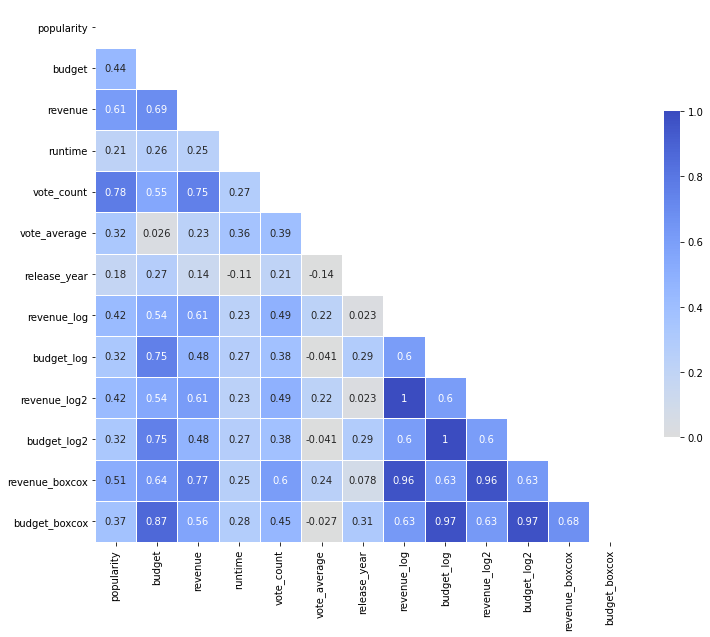

In [67]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm_r",
    vmin=0.0,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
);

# Budget x Revenue distribution

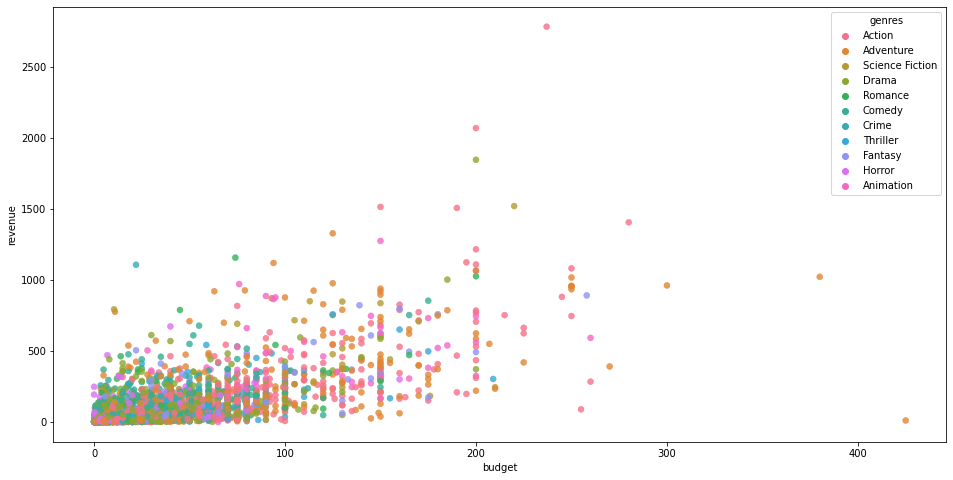

In [68]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_movies, x="budget", y="revenue", hue="genres", edgecolor=None, alpha=0.8);

# Budget x Revenue distribution - Boxcox

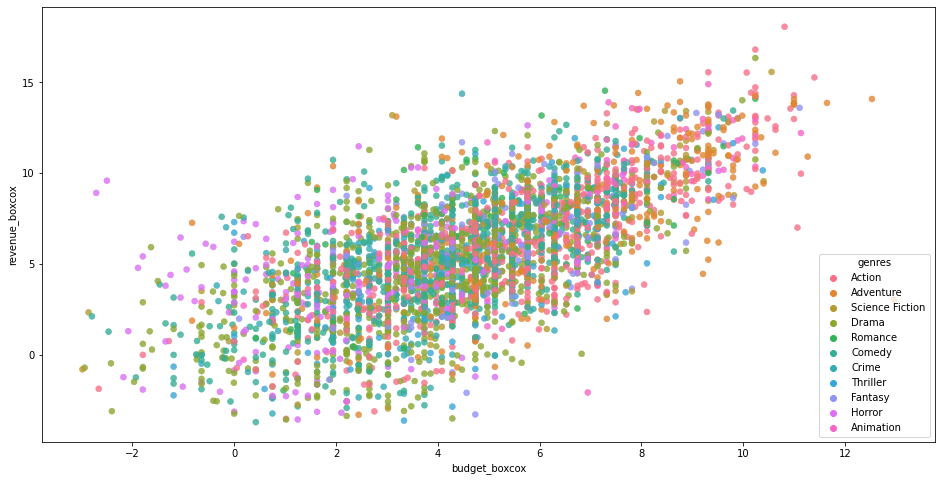

In [69]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_movies, x="budget_boxcox", y="revenue_boxcox", hue="genres", edgecolor=None, alpha=0.8);

# Budget x Revenue distribution - log(e)

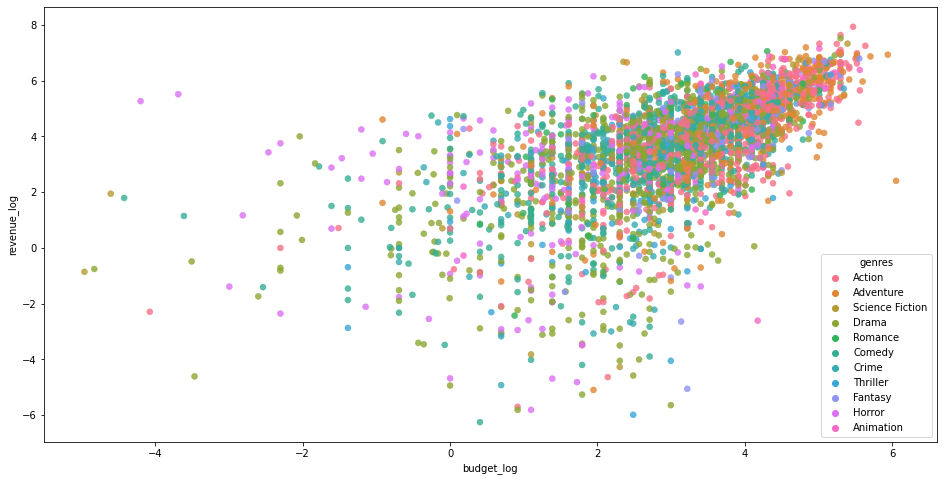

In [70]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_movies, x="budget_log", y="revenue_log", hue="genres", edgecolor=None, alpha=0.8
);


# Linear Regression model

### Revenue x Budget

In [71]:
X = df_movies[["budget"]] #FEATURE
Y = df_movies["revenue"]  #TARGET

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

### Revenue x Budget - log(e)

In [72]:
Z = df_movies[["budget_log"]] 
W = df_movies["revenue_log"]  

model_log = LinearRegression()

model_log.fit(Z, W)

LinearRegression()

### Revenue x Budget - Boxcox

In [73]:
K = df_movies[["budget_boxcox"]] 
U = df_movies["revenue_boxcox"]  

model_boxcox = LinearRegression()

model_boxcox.fit(K, U)

LinearRegression()

#### Coef. model

In [74]:
model.coef_

array([2.88524112])

#### Coef. model_log

In [75]:
model_log.coef_

array([0.87079888])

#### Coef. model_boxcox

In [76]:
model_boxcox.coef_

array([0.93299808])

#### Intercept model

In [77]:
model.intercept_

0.45630277578609935

#### Intercept model_log

In [78]:
model_log.intercept_

0.9450864380178956

#### Intercept model_boxcox

In [79]:
model_boxcox.intercept_

1.293026287769405

### Real x Predict - Model

In [80]:
predict = model.predict(X)
predict2 = model_log.predict(Z)
predict3 = model_boxcox.predict(K)

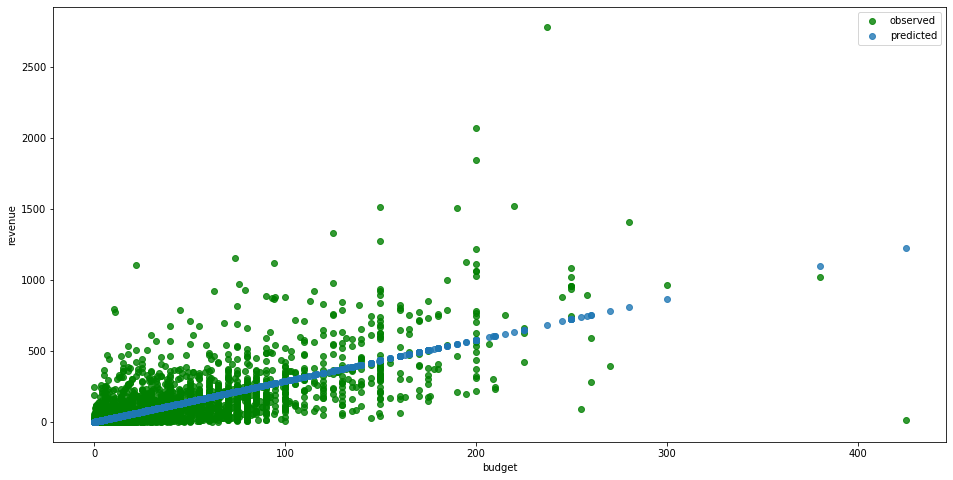

In [81]:
plt.figure(figsize=(16, 8))
plt.xlabel("budget")
plt.ylabel("revenue")
plt.scatter(X, Y, color="green", label="observed", alpha=0.8)


plt.scatter(X, predict, label="predicted", alpha=0.8)
plt.legend();

### Real x Predict - model_log

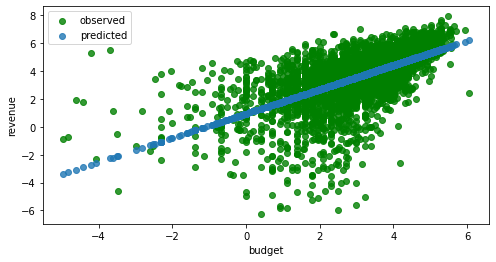

In [82]:
plt.figure(figsize=(8, 4))
plt.xlabel("budget")
plt.ylabel("revenue")
plt.scatter(Z, W, color="green", label="observed", alpha=0.8)


plt.scatter(Z, predict2, label="predicted", alpha=0.8)
plt.legend();

### Real x Predict - model_boxcox

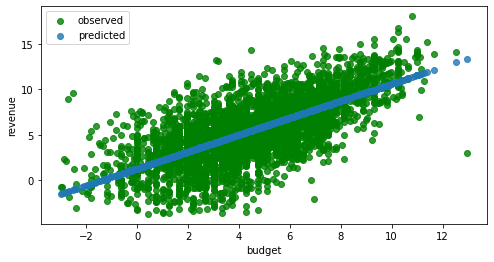

In [83]:
plt.figure(figsize=(8, 4))
plt.xlabel("budget")
plt.ylabel("revenue")
plt.scatter(K, U, color="green", label="observed", alpha=0.8)


plt.scatter(K, predict3, label="predicted", alpha=0.8)
plt.legend();

### Error calculation - model

In [84]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,1.205792,37.747450,109.366798,109.375231,535.518352,6.166095,2001.252971,3.541980,2.982197,5.109997,4.302400,5.615456,4.632838
std,1.483666,42.325143,177.599524,19.840940,885.575294,0.792004,11.323016,1.950916,1.352427,2.814577,1.951140,3.381704,2.453155
min,0.010335,0.007000,0.001938,26.000000,10.000000,2.200000,1960.000000,-6.246099,-4.961845,-9.011216,-7.158429,-3.700650,-2.981377
25%,0.470439,10.000000,14.409461,96.000000,74.000000,5.700000,1995.000000,2.667885,2.302585,3.848944,3.321928,3.450783,3.021727
50%,0.812194,25.000000,46.396427,106.000000,209.000000,6.200000,2004.000000,3.837222,3.218876,5.535942,4.643856,5.591265,4.736118
75%,1.388622,50.000000,127.145580,119.000000,585.500000,6.700000,2010.000000,4.845326,3.912023,6.990328,5.643856,7.847920,6.290829
max,32.985763,425.000000,2781.505847,338.000000,9767.000000,8.400000,2015.000000,7.930748,6.052089,11.441650,8.731319,18.062883,12.962775


In [85]:
np.sqrt(mean_squared_error(Y, model.predict(X)))

128.93538896635383

### Error calculation - model_log

In [86]:
np.sqrt(mean_squared_error(W, model_log.predict(Z)))

1.5551448416694473

### Error calculation - model_boxcox

In [87]:
np.sqrt(mean_squared_error(U, model_boxcox.predict(K)))

2.489122220967963

# Mean Squared Error (MSE):

In [88]:
movies_observed = df_movies["revenue_log"]
movies_predicted = predict2

In [89]:
list(zip(movies_observed, movies_predicted))

[(7.322199163629134, 5.308342025753311),
 (5.936047905501703, 5.308342025753311),
 (5.687782491535502, 5.0382594624544215),
 (7.634423414216579, 5.558855251410645),
 (7.31737797234261, 5.5141891082544),
 (6.278428554938059, 5.216594207026143),
 (6.088145462025535, 5.336895366648395),
 (6.389200396305526, 5.0222810531061155),
 (7.053353169471426, 4.693061488213054),
 (6.749589928304175, 5.442576264653513),
 (6.780688214920049, 5.73557591048388),
 (5.214869032556832, 5.447538109885083),
 (3.607382318439248, 3.3032535123107003),
 (5.495679786149837, 4.8439463085343935),
 (7.2478180383833255, 5.8518548972410125),
 (5.048317112219286, 4.240354522026865),
 (5.786195982069487, 4.316123931405728),
 (6.251137043940448, 5.1837299717967005),
 (6.29591404418211, 4.910597321746872),
 (6.477777311139588, 5.3645420974906175),
 (5.342504897691082, 5.5141891082544),
 (4.51862953818809, 3.906845298818228),
 (6.153776473182027, 5.0382594624544215),
 (6.345024712406323, 4.157358524475562),
 (4.89295104855

In [90]:
residual_squared = []

for y_o, y_p in list(zip(movies_observed, movies_predicted)):
    residual = y_o - y_p
    residual_squared.append(residual ** 2)

In [91]:
np.max(residual_squared)
print(f'Max error {np.max(residual_squared)}, min error {np.min(residual_squared)}, mean error {np.mean(residual_squared)}')

Max error 84.4833158528041, min error 4.858769478105202e-09, mean error 2.4184754785710907


In [92]:
mean_squared_error(movies_observed, movies_predicted)

2.4184754785710907

# Coefficient of Determination  𝑅²

In [93]:
from sklearn.metrics import r2_score

In [94]:
movies_observed

0        7.322199
1        5.936048
2        5.687782
3        7.634423
4        7.317378
           ...   
10822    3.518586
10828    2.564949
10829    1.791759
10835    2.995732
10848    2.484907
Name: revenue_log, Length: 3787, dtype: float64

In [95]:
movies_predicted

array([5.30834203, 5.30834203, 5.03825946, ..., 2.28395031, 3.10894036,
       2.36638468])

In [96]:
type(movies_observed)

pandas.core.series.Series

In [97]:
type(movies_predicted)

numpy.ndarray

In [98]:
movies_predicted.shape

(3787,)

In [99]:
r2_score(movies_observed, movies_predicted)

0.36440673822731773

In [100]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,1.205792,37.747450,109.366798,109.375231,535.518352,6.166095,2001.252971,3.541980,2.982197,5.109997,4.302400,5.615456,4.632838
std,1.483666,42.325143,177.599524,19.840940,885.575294,0.792004,11.323016,1.950916,1.352427,2.814577,1.951140,3.381704,2.453155
min,0.010335,0.007000,0.001938,26.000000,10.000000,2.200000,1960.000000,-6.246099,-4.961845,-9.011216,-7.158429,-3.700650,-2.981377
25%,0.470439,10.000000,14.409461,96.000000,74.000000,5.700000,1995.000000,2.667885,2.302585,3.848944,3.321928,3.450783,3.021727
50%,0.812194,25.000000,46.396427,106.000000,209.000000,6.200000,2004.000000,3.837222,3.218876,5.535942,4.643856,5.591265,4.736118
75%,1.388622,50.000000,127.145580,119.000000,585.500000,6.700000,2010.000000,4.845326,3.912023,6.990328,5.643856,7.847920,6.290829
max,32.985763,425.000000,2781.505847,338.000000,9767.000000,8.400000,2015.000000,7.930748,6.052089,11.441650,8.731319,18.062883,12.962775


# Data Frame division by genres

In [101]:
df_drama = df_movies[df_movies["genres"] == "Drama"]
df_comedy = df_movies[df_movies["genres"] == "Comedy"]
df_action = df_movies[df_movies["genres"] == "Action"]
df_adventure = df_movies[df_movies["genres"] == "Adventure"]   
df_horror = df_movies[df_movies["genres"] == "Horror"] 
df_crime = df_movies[df_movies["genres"] == "Crime"] 
df_thriller = df_movies[df_movies["genres"] == "Thriller"] 
df_fantasy = df_movies[df_movies["genres"] == "Fantasy"]  
df_animation = df_movies[df_movies["genres"] == "Animation"] 
df_science = df_movies[df_movies["genres"] == "Science Fiction"]
df_romance = df_movies[df_movies["genres"] == "Romance"] 
df_family = df_movies[df_movies["genres"] == "Family"] 
df_mystery = df_movies[df_movies["genres"] == "Mystery"] 
df_documentary = df_movies[df_movies["genres"] == "Documentary"] 
df_music = df_movies[df_movies["genres"] == "Music"] 
df_war = df_movies[df_movies["genres"] == "War"] 
df_history = df_movies[df_movies["genres"] == "History"] 
df_western = df_movies[df_movies["genres"] == "Western"] 

In [102]:
X1 = df_drama[["budget"]]
Y1 = df_drama["revenue"]

X2 = df_comedy[["budget"]]
Y2 = df_comedy["revenue"]

X3 = df_action[["budget"]]
Y3 = df_action["revenue"]

X4 = df_adventure[["budget"]]
Y4 = df_adventure["revenue"]

X5 = df_horror[["budget"]]
Y5 = df_horror["revenue"]

X6 = df_crime[["budget"]]
Y6 = df_crime["revenue"]

X7 = df_thriller[["budget"]]
Y7 = df_thriller["revenue"]

X8 = df_fantasy[["budget"]]
Y8 = df_fantasy["revenue"]

X9 = df_animation[["budget"]]
Y9 = df_animation["revenue"]

X10 = df_science[["budget"]]
Y10 = df_science["revenue"]

X11 = df_romance[["budget"]]
Y11 = df_romance["revenue"]

X12 = df_family[["budget"]]
Y12 = df_family["revenue"]

X13 = df_mystery[["budget"]]
Y13 = df_mystery["revenue"]

X14 = df_documentary[["budget"]]
Y14 = df_documentary["revenue"]

X15 = df_music[["budget"]]
Y15 = df_music["revenue"]

X16 = df_war[["budget"]]
Y16 = df_war["revenue"]

X17 = df_history[["budget"]]
Y17 = df_history["revenue"]

X18 = df_western[["budget"]]
Y18 = df_western["revenue"]

In [103]:
Z1 = df_drama[["budget_log"]]
W1 = df_drama["revenue_log"]

Z2 = df_comedy[["budget_log"]]
W2 = df_comedy["revenue_log"]

Z3 = df_action[["budget_log"]]
W3 = df_action["revenue_log"]

Z4 = df_adventure[["budget_log"]]
W4 = df_adventure["revenue_log"]

Z5 = df_horror[["budget_log"]]
W5 = df_horror["revenue_log"]

Z6 = df_crime[["budget_log"]]
W6 = df_crime["revenue_log"]

Z7 = df_thriller[["budget_log"]]
W7 = df_thriller["revenue_log"]

Z8 = df_fantasy[["budget_log"]]
W8 = df_fantasy["revenue_log"]

Z9 = df_animation[["budget_log"]]
W9 = df_animation["revenue_log"]

Z10 = df_science[["budget_log"]]
W10 = df_science["revenue_log"]

Z11 = df_romance[["budget_log"]]
W11 = df_romance["revenue_log"]

In [104]:
K1 = df_drama[["budget_boxcox"]]
U1 = df_drama["revenue_boxcox"]

K2 = df_comedy[["budget_boxcox"]]
U2 = df_comedy["revenue_boxcox"]

K3 = df_action[["budget_boxcox"]]
U3 = df_action["revenue_boxcox"]

K4 = df_adventure[["budget_boxcox"]]
U4 = df_adventure["revenue_boxcox"]

K5 = df_horror[["budget_boxcox"]]
U5 = df_horror["revenue_boxcox"]

K6 = df_crime[["budget_boxcox"]]
U6 = df_crime["revenue_boxcox"]

K7 = df_thriller[["budget_boxcox"]]
U7 = df_thriller["revenue_boxcox"]

K8 = df_fantasy[["budget_boxcox"]]
U8 = df_fantasy["revenue_boxcox"]

K9 = df_animation[["budget_boxcox"]]
U9 = df_animation["revenue_boxcox"]

K10 = df_science[["budget_boxcox"]]
U10 = df_science["revenue_boxcox"]

K11 = df_romance[["budget_boxcox"]]
U11 = df_romance["revenue_boxcox"]

# df_drama example:

In [105]:
df_drama

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox
7,7.667400,108.0,595.380321,The Martian,141,Drama,Twentieth Century Fox Film Corporation,4572,7.6,2015,6.389200,4.682131,9.217668,6.754888,12.234179,8.329645
12,6.118847,15.0,36.869414,Ex Machina,108,Drama,DNA Films,2854,7.6,2015,3.607382,2.708050,5.204353,3.906891,5.133143,3.736726
23,4.710402,40.0,569.651467,Fifty Shades of Grey,125,Drama,Focus Features,1865,5.3,2015,6.345025,3.688879,9.153936,5.321928,12.090456,5.763474
28,4.062293,20.0,88.346473,Spotlight,128,Drama,Participant Media,1559,7.8,2015,4.481266,2.995732,6.465101,4.321928,6.983953,4.285314
35,3.557846,6.0,35.401758,Room,117,Drama,Element Pictures,1520,8.0,2015,3.566761,1.791759,5.145749,2.584963,5.054187,2.209474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,0.859806,3.6,44.785053,Midnight Cowboy,113,Drama,United Artists,124,7.0,1969,3.801874,1.280934,5.484945,1.847997,5.519533,1.485884
10762,0.959754,15.0,50.000000,The Deer Hunter,183,Drama,Universal Pictures,464,7.4,1978,3.912023,2.708050,5.643856,3.906891,5.744616,3.736726
10770,0.512719,2.3,35.000000,Midnight Express,121,Drama,Columbia Pictures,141,7.5,1978,3.555348,0.832909,5.129283,1.201634,5.032108,0.916570
10771,0.496029,4.0,30.471420,The Lord of the Rings,132,Drama,Fantasy Films,91,6.0,1978,3.416789,1.386294,4.929385,2.000000,4.767771,1.628361


In [106]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()
model8 = LinearRegression()
model9 = LinearRegression()
model10 = LinearRegression()
model11 = LinearRegression()


model1.fit(X1, Y1)
model2.fit(X2, Y2)
model3.fit(X3, Y3)
model4.fit(X4, Y4)
model5.fit(X5, Y5)
model6.fit(X6, Y6)
model7.fit(X7, Y7)
model8.fit(X8, Y8)
model9.fit(X9, Y9)
model10.fit(X10, Y10)
model11.fit(X11, Y11)

LinearRegression()

In [107]:
model_log1 = LinearRegression()
model_log2 = LinearRegression()
model_log3 = LinearRegression()
model_log4 = LinearRegression()
model_log5 = LinearRegression()
model_log6 = LinearRegression()
model_log7 = LinearRegression()
model_log8 = LinearRegression()
model_log9 = LinearRegression()
model_log10 = LinearRegression()
model_log11 = LinearRegression()


model_log1.fit(Z1, W1)
model_log2.fit(Z2, W2)
model_log3.fit(Z3, W3)
model_log4.fit(Z4, W4)
model_log5.fit(Z5, W5)
model_log6.fit(Z6, W6)
model_log7.fit(Z7, W7)
model_log8.fit(Z8, W8)
model_log9.fit(Z9, W9)
model_log10.fit(Z10, W10)
model_log11.fit(Z11, W11)


LinearRegression()

In [108]:
model_boxcox1 = LinearRegression()
model_boxcox2 = LinearRegression()
model_boxcox3 = LinearRegression()
model_boxcox4 = LinearRegression()
model_boxcox5 = LinearRegression()
model_boxcox6 = LinearRegression()
model_boxcox7 = LinearRegression()
model_boxcox8 = LinearRegression()
model_boxcox9 = LinearRegression()
model_boxcox10 = LinearRegression()
model_boxcox11 = LinearRegression()

model_boxcox1.fit(K1, U1)
model_boxcox2.fit(K2, U2)
model_boxcox3.fit(K3, U3)
model_boxcox4.fit(K4, U4)
model_boxcox5.fit(K5, U5)
model_boxcox6.fit(K6, U6)
model_boxcox7.fit(K7, U7)
model_boxcox8.fit(K8, U8)
model_boxcox9.fit(K9, U9)
model_boxcox10.fit(K10, U10)
model_boxcox11.fit(K11, U11)

LinearRegression()

In [109]:
df_drama["predict_revenue"] = model1.predict(X1)
df_comedy["predict_revenue"] = model2.predict(X2)
df_action["predict_revenue"] = model3.predict(X3)
df_adventure["predict_revenue"] = model4.predict(X4)
df_horror["predict_revenue"] = model5.predict(X5)
df_crime["predict_revenue"] = model6.predict(X6)
df_thriller["predict_revenue"] = model7.predict(X7)
df_fantasy["predict_revenue"] = model8.predict(X8)
df_animation["predict_revenue"] = model9.predict(X9)
df_science["predict_revenue"] = model10.predict(X10)
df_romance["predict_revenue"] = model11.predict(X11)

In [110]:
df_drama["predict_revenue2"] = np.exp(model_log1.predict(Z1))
df_comedy["predict_revenue2"] = np.exp(model_log2.predict(Z2))
df_action["predict_revenue2"] = np.exp(model_log3.predict(Z3))
df_adventure["predict_revenue2"] = np.exp(model_log4.predict(Z4))
df_horror["predict_revenue2"] = np.exp(model_log5.predict(Z5))
df_crime["predict_revenue2"] = np.exp(model_log6.predict(Z6))
df_thriller["predict_revenue2"] = np.exp(model_log7.predict(Z7))
df_fantasy["predict_revenue2"] = np.exp(model_log8.predict(Z8))
df_animation["predict_revenue2"] = np.exp(model_log9.predict(Z9))
df_science["predict_revenue2"] = np.exp(model_log10.predict(Z10))
df_romance["predict_revenue2"] = np.exp(model_log11.predict(Z11))


In [111]:
df_drama["predict_revenue3"] = inv_boxcox(model_boxcox1.predict(K1), lambda_revenue)
df_comedy["predict_revenue3"] = inv_boxcox(model_boxcox2.predict(K2), lambda_revenue)
df_action["predict_revenue3"] = inv_boxcox(model_boxcox3.predict(K3), lambda_revenue)
df_adventure["predict_revenue3"] = inv_boxcox(model_boxcox4.predict(K4), lambda_revenue)
df_horror["predict_revenue3"] = inv_boxcox(model_boxcox5.predict(K5), lambda_revenue)
df_crime["predict_revenue3"] = inv_boxcox(model_boxcox6.predict(K6), lambda_revenue)
df_thriller["predict_revenue3"] = inv_boxcox(model_boxcox7.predict(K7), lambda_revenue)
df_fantasy["predict_revenue3"] = inv_boxcox(model_boxcox8.predict(K8), lambda_revenue)
df_animation["predict_revenue3"] = inv_boxcox(model_boxcox9.predict(K9), lambda_revenue)
df_science["predict_revenue3"] = inv_boxcox(model_boxcox10.predict(K10), lambda_revenue)
df_romance["predict_revenue3"] = inv_boxcox(model_boxcox11.predict(K11), lambda_revenue)

# Drama

In [112]:
df_drama.budget.describe()

count    901.000000
mean      25.021985
std       25.878890
min        0.008000
25%        8.000000
50%       16.500000
75%       32.000000
max      200.000000
Name: budget, dtype: float64

In [113]:
df_drama.revenue.describe()

count     901.000000
mean       66.115410
std       110.754413
min         0.003003
25%         8.038061
50%        28.607524
75%        82.466670
max      1845.034188
Name: revenue, dtype: float64

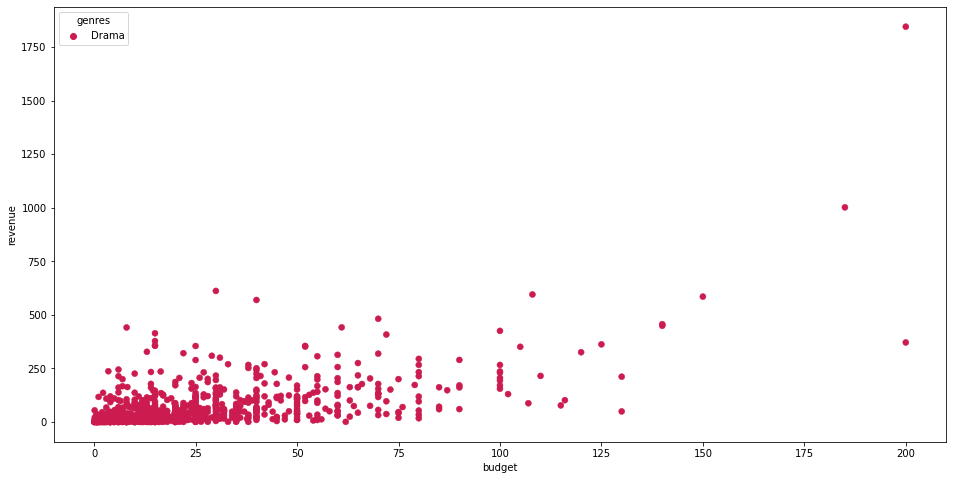

In [114]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_drama.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model

In [115]:
model1.coef_

array([2.55777489])

In [116]:
np.sqrt(mean_squared_error(df_drama["revenue"], df_drama["predict_revenue"]))

88.74884893368667

In [117]:
mean_squared_error(df_drama["revenue"], df_drama["predict_revenue"])

7876.358187054339

### Mean Squared Error (MSE):

In [118]:
y_observed = df_drama["revenue"]
y_predicted = df_drama["predict_revenue"]

In [119]:
list(zip(y_observed, y_predicted))

[(595.380321, 278.3544926465568),
 (36.869414, 40.481427419259894),
 (569.651467, 104.42579979218918),
 (88.346473, 53.270301893845755),
 (35.401758, 17.461453365005354),
 (62.076141, 30.25032783959121),
 (201.634991, 73.73250105318313),
 (34.441873, 78.84805084301746),
 (85.5123, 32.80810273450838),
 (36.606743, 53.270301893845755),
 (64.191523, 40.481427419259894),
 (137.935567, 91.63692531760333),
 (32.848185, 35.365877629425555),
 (48.623572, 91.63692531760333),
 (5.214043, 8.509241232795256),
 (18.34, 32.62905849186418),
 (0.208588, 53.270301893845755),
 (61.619773, 30.25032783959121),
 (8.235661, 40.481427419259894),
 (104.303851, 27.69255294467404),
 (34.227298, 104.42579979218918),
 (1.477002, 7.23035378533667),
 (60.273173, 32.80810273450838),
 (7.587485, 27.69255294467404),
 (24.902723, 66.05917636843161),
 (16.00242, 37.92365252434273),
 (11.12209, 17.461453365005354),
 (85.978266, 27.69255294467404),
 (7.002261, 73.73250105318313),
 (0.695269, 9.788128680253841),
 (2.541554

In [120]:
residual_squared = []

for y_o, y_p in list(zip(y_observed, y_predicted)):
    residual = y_o - y_p
    residual_squared.append(residual ** 2)

In [121]:
np.max(residual_squared)
print(f'Max error {np.max(residual_squared)}, min error {np.min(residual_squared)}, mean error {np.mean(residual_squared)}')

Max error 1772531.1789570902, min error 0.0006637963412991321, mean error 7876.358187054339


In [122]:
mean_squared_error(y_observed, y_predicted)

7876.358187054339

### Model Log(e)

In [123]:
model_log1.coef_

array([0.85884974])

In [124]:
np.sqrt(mean_squared_error(df_drama["revenue"], df_drama["predict_revenue2"]))

104.06946627347781

### Model Boxcox

In [125]:
model_boxcox1.coef_

array([0.89149481])

In [126]:
np.sqrt(mean_squared_error(df_drama["revenue"], df_drama["predict_revenue3"]))

96.45354053857709

# Comedy

In [127]:
df_comedy.budget.describe()

count    778.000000
mean      26.371230
std       23.822166
min        0.012000
25%        8.000000
50%       20.000000
75%       37.000000
max      175.000000
Name: budget, dtype: float64

In [128]:
df_comedy.revenue.describe()

count    778.000000
mean      79.694576
std       99.494253
min        0.001938
25%       14.831951
50%       41.281488
75%      107.398438
max      853.708609
Name: revenue, dtype: float64

In [129]:
df_comedy.sort_values('budget').head(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
7277,0.412913,0.012,6.000000,Pink Flamingos,93,Comedy,Dreamland Productions,51,6.3,1972,1.791759,-4.422849,2.584963,-6.380822,2.125009,-2.794853,14.907725,0.076861,0.390950
4192,1.297355,0.027,3.151130,Clerks,92,Comedy,Miramax Films,383,7.2,1994,1.147761,-3.611918,1.655869,-5.210897,1.278933,-2.467662,14.944593,0.152299,0.549354
6945,0.139931,0.079,0.245000,The Foot Fist Way,85,Comedy,Gary Sanchez Productions,19,5.3,2006,-1.406497,-2.538307,-2.029146,-3.662004,-1.238166,-1.930976,15.072401,0.376611,0.919731
6284,0.733587,0.169,18.564702,Keeping Mum,103,Comedy,Summit Entertainment,73,6.5,2005,2.921262,-1.777857,4.214490,-2.564905,3.876066,-1.463746,15.293606,0.715151,1.388330
8498,0.802896,0.200,4.505922,Swingers,94,Comedy,Miramax Films,129,6.9,1996,1.505393,-1.609438,2.171822,-2.321928,1.736296,-1.348936,15.369800,0.824287,1.529060
2805,0.251798,0.250,4.186931,Lovely & Amazing,91,Comedy,N,10,6.3,2001,1.431968,-1.386294,2.065893,-2.000000,1.639907,-1.189922,15.492692,0.994951,1.742965
9710,0.159907,0.250,0.154323,"Silent Night, Deadly Night Part 2",88,Comedy,Silent Night Releasing Corporation,11,5.5,1987,-1.868707,-1.386294,-2.695975,-2.000000,-1.579516,-1.189922,15.492692,0.994951,1.742965
1853,0.114458,0.250,0.232732,Big Fan,91,Comedy,Big Fan Productions,16,5.7,2009,-1.457868,-1.386294,-2.103259,-2.000000,-1.277564,-1.189922,15.492692,0.994951,1.742965
3818,0.331313,0.250,1.000000,Louis C.K.: Live at the Beacon Theater,62,Comedy,N,47,7.9,2011,0.000000,-1.386294,0.000000,-2.000000,0.000000,-1.189922,15.492692,0.994951,1.742965
5255,1.212565,0.250,12.021272,Chasing Amy,113,Comedy,Miramax Films,227,6.7,1997,2.486678,-1.386294,3.587518,-2.000000,3.158650,-1.189922,15.492692,0.994951,1.742965


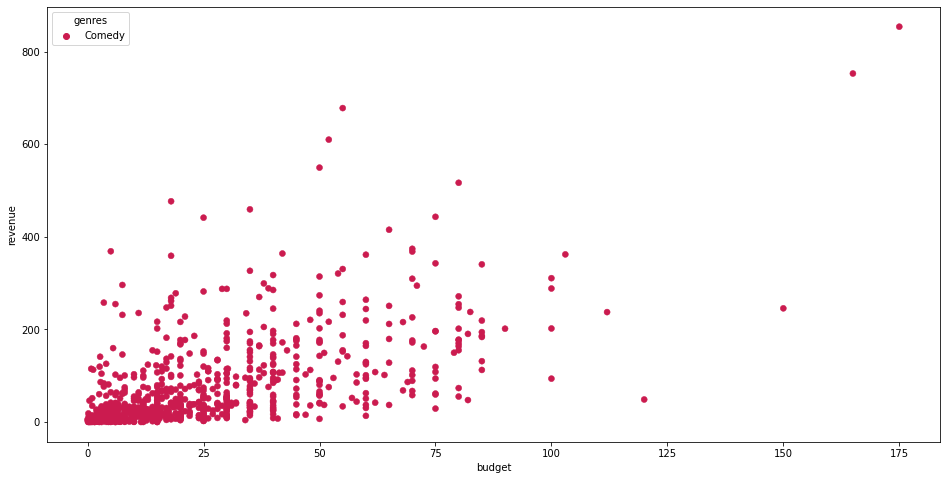

In [130]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_comedy.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [131]:
model2.coef_

array([2.45784309])

In [132]:
np.sqrt(mean_squared_error(df_comedy["revenue"], df_comedy["predict_revenue"]))

80.39000194874566

### Model log(e)

In [133]:
model_log2.coef_

array([0.84328982])

In [134]:
np.sqrt(mean_squared_error(df_comedy["revenue"], df_comedy["predict_revenue2"]))

89.26508520527354

### Model Boxcox

In [135]:
model_boxcox2.coef_

array([0.90171631])

In [136]:
np.sqrt(mean_squared_error(df_comedy["revenue"], df_comedy["predict_revenue3"]))

84.63772084495855

# Action

In [137]:
df_action.budget.describe()

count    685.000000
mean      52.047794
std       49.459404
min        0.017000
25%       17.000000
50%       38.000000
75%       70.000000
max      280.000000
Name: budget, dtype: float64

In [138]:
df_action.revenue.describe()

count     685.000000
mean      136.722442
std       231.155742
min         0.003358
25%        17.833000
50%        57.777106
75%       159.330280
max      2781.505847
Name: revenue, dtype: float64

In [139]:
df_action.sort_values('budget').head(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
3785,0.195283,0.017000,0.101236,Bellflower,106,Action,Coatwolf Productions,24,6.7,2011,-2.290301,-4.074542,-3.304206,-5.878321,-1.866378,-2.661639,-38.494191,0.023177,0.045012
2191,0.332904,0.100000,1.000000,Halo Legends,93,Action,Microsoft,19,7.2,2010,0.000000,-2.302585,0.000000,-3.321928,0.000000,-1.794645,-38.214684,0.140380,0.184035
8288,0.548648,0.220000,2.040920,El Mariachi,81,Action,Columbia Pictures,116,6.5,1992,0.713401,-1.514128,1.029220,-2.184425,0.762697,-1.281998,-37.810577,0.312880,0.365897
9198,0.914399,0.500000,10.166459,Cyborg,86,Action,Cannon Group,73,4.8,1989,2.319094,-0.693147,3.345745,-1.000000,2.897071,-0.641523,-36.867661,0.720788,0.775652
10647,0.066994,1.000000,2.000000,Dillinger,107,Action,American International Pictures (AIP),10,6.7,1973,0.693147,0.000000,1.000000,0.000000,0.739625,0.000000,-35.183883,1.458158,1.501387
5908,0.171647,1.052753,0.466088,On the Job,120,Action,ABS-CBN Film Productions,23,5.9,2013,-0.763381,0.051409,-1.101326,0.074167,-0.711852,0.051709,-35.006234,1.536383,1.578166
9952,0.275523,1.300000,72.266306,Vanishing Point,99,Action,Twentieth Century Fox Film Corporation,48,7.1,1971,4.280358,0.262364,6.175251,0.378512,6.531542,0.270309,-34.173616,1.903830,1.938974
9196,0.942350,1.500000,14.697005,Kickboxer,97,Action,Kings Road Entertainment,139,6.2,1989,2.687644,0.405465,3.877450,0.584963,3.483235,0.424647,-33.500105,2.201920,2.232089
9455,1.392581,1.500000,11.806119,Bloodsport,92,Action,Cannon Films,180,6.4,1988,2.468618,0.405465,3.561463,0.584963,3.130069,0.424647,-33.500105,2.201920,2.232089
10336,0.320607,1.500000,0.418961,Killing Zoe,96,Action,Live Entertainment,46,5.8,1993,-0.869977,0.405465,-1.255112,0.584963,-0.803482,0.424647,-33.500105,2.201920,2.232089


In [140]:
df_action.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
10,6.200282,245.0,880.674609,Spectre,148,Action,Columbia Pictures,3254,6.2,2015,6.780688,5.501258,9.782465,7.936638,13.560604,10.925839,786.499875,391.194398,526.500682
4363,6.591277,250.0,1081.041287,The Dark Knight Rises,165,Action,Legendary Pictures,6723,7.5,2012,6.985680,5.521461,10.078206,7.965784,14.294492,10.996149,803.337657,399.311046,538.726569
4365,5.603587,200.0,1108.561013,Skyfall,143,Action,Columbia Pictures,6137,6.8,2012,7.010818,5.298317,10.114472,7.643856,14.386423,10.237110,634.959838,318.274812,418.246069
3522,0.760503,195.0,1123.746996,Transformers: Dark of the Moon,154,Action,Paramount Pictures,2456,6.1,2011,7.024424,5.273000,10.134102,7.607330,14.436358,10.153385,618.122056,310.188333,406.428030
5425,4.946136,200.0,1215.439994,Iron Man 3,130,Action,Marvel Studios,6882,6.9,2013,7.102861,5.298317,10.247263,7.643856,14.726704,10.237110,634.959838,318.274812,418.246069
14,5.944927,280.0,1405.035767,Avengers: Age of Ultron,141,Action,Marvel Studios,4304,7.4,2015,7.247818,5.634790,10.456391,8.129283,15.274511,11.396571,904.364348,448.065449,612.845763
4,9.335014,190.0,1506.249360,Furious 7,137,Action,Universal Pictures,2947,7.3,2015,7.317378,5.247024,10.556745,7.569856,15.542656,10.067983,601.284274,302.105276,394.654894
0,32.985763,150.0,1513.528810,Jurassic World,124,Action,Universal Studios,5562,6.5,2015,7.322199,5.010635,10.563700,7.228819,15.561369,9.313426,466.582018,237.575697,302.201594
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,136,Action,Lucasfilm,5292,7.5,2015,7.634423,5.298317,11.014145,7.643856,16.809565,10.237110,634.959838,318.274812,418.246069
1386,9.432768,237.0,2781.505847,Avatar,162,Action,Ingenious Film Partners,8458,7.1,2009,7.930748,5.468060,11.441650,7.888743,18.062883,10.810999,759.559424,378.213470,507.018201


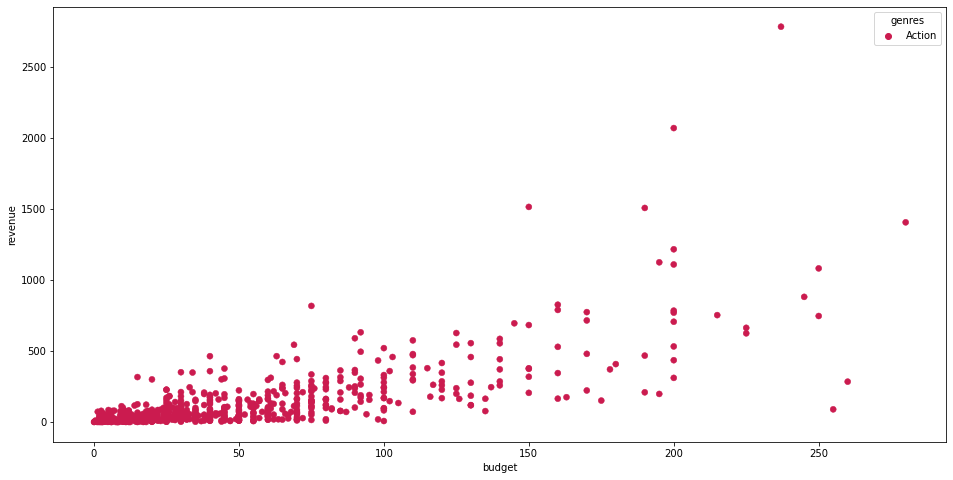

In [141]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_action.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [142]:
model3.coef_

array([3.36755638])

In [143]:
np.sqrt(mean_squared_error(df_action["revenue"], df_action["predict_revenue"]))

160.16905368601587

### Model log(e)

In [144]:
model_log3.coef_

array([1.01650026])

In [145]:
np.sqrt(mean_squared_error(df_action["revenue"], df_action["predict_revenue2"]))

190.66342381008664

### Model boxcox

In [146]:
model_boxcox3.coef_

array([1.04477071])

In [147]:
np.sqrt(mean_squared_error(df_action["revenue"], df_action["predict_revenue3"]))

175.3366410891544

# Adventure

In [148]:
df_adventure.budget.describe()

count    328.000000
mean      71.483598
std       65.439507
min        0.400000
25%       20.000000
50%       50.000000
75%      106.250000
max      425.000000
Name: budget, dtype: float64

In [149]:
df_adventure.revenue.describe()

count     328.000000
mean      222.611666
std       266.711307
min         0.006147
25%        29.790503
50%       114.975673
75%       333.412051
max      1327.817822
Name: revenue, dtype: float64

In [150]:
df_adventure.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
2902,1.628345,225.0,419.651413,The Chronicles of Narnia: Prince Caspian,150,Adventure,Walt Disney,891,6.1,2008,6.039424,5.416100,8.713048,7.813781,11.127780,10.632980,611.393224,388.212243,489.330921
1389,5.076472,250.0,933.959197,Harry Potter and the Half-Blood Prince,153,Adventure,Warner Bros.,3220,7.3,2009,6.839433,5.521461,9.867216,7.965784,13.768073,10.996149,674.705931,427.761753,545.071888
5431,4.310786,250.0,958.400000,The Hobbit: The Desolation of Smaug,161,Adventure,WingNut Films,2952,7.6,2013,6.865265,5.521461,9.904484,7.965784,13.860023,10.996149,674.705931,427.761753,545.071888
1923,4.840588,250.0,954.305868,Harry Potter and the Deathly Hallows: Part 1,146,Adventure,Warner Bros.,3467,7.4,2010,6.860984,5.521461,9.898308,7.965784,13.844754,10.996149,674.705931,427.761753,545.071888
4367,4.218933,250.0,1017.003568,The Hobbit: An Unexpected Journey,169,Adventure,WingNut Films,6417,6.9,2012,6.924616,5.521461,9.990109,7.965784,14.072955,10.996149,674.705931,427.761753,545.071888
634,10.174599,250.0,955.119788,The Hobbit: The Battle of the Five Armies,144,Adventure,WingNut Films,3110,7.1,2014,6.861837,5.521461,9.899538,7.965784,13.847794,10.996149,674.705931,427.761753,545.071888
6570,1.957331,270.0,391.081192,Superman Returns,154,Adventure,DC Comics,834,5.3,2006,5.968915,5.598422,8.611324,8.076816,10.913301,11.266953,725.356097,459.174731,589.915374
7387,4.965391,300.0,961.000000,Pirates of the Caribbean: At World's End,169,Adventure,Walt Disney Pictures,2626,6.8,2007,6.867974,5.703782,9.908393,8.228819,13.869692,11.645419,801.331345,505.953616,657.580377
3375,4.955130,380.0,1021.683000,Pirates of the Caribbean: On Stranger Tides,136,Adventure,Walt Disney Pictures,3180,6.3,2011,6.929207,5.940171,9.996732,8.569856,14.089523,12.528109,1003.932007,628.985238,840.204433
2244,0.250540,425.0,11.087569,The Warrior's Way,100,Adventure,Boram Entertainment Inc.,74,6.4,2010,2.405825,6.052089,3.470871,8.731319,3.031433,12.962775,1117.894879,697.261077,944.220363


In [151]:
df_adventure.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
1923,4.840588,250.0,954.305868,Harry Potter and the Deathly Hallows: Part 1,146,Adventure,Warner Bros.,3467,7.4,2010,6.860984,5.521461,9.898308,7.965784,13.844754,10.996149,674.705931,427.761753,545.071888
634,10.174599,250.0,955.119788,The Hobbit: The Battle of the Five Armies,144,Adventure,WingNut Films,3110,7.1,2014,6.861837,5.521461,9.899538,7.965784,13.847794,10.996149,674.705931,427.761753,545.071888
5431,4.310786,250.0,958.400000,The Hobbit: The Desolation of Smaug,161,Adventure,WingNut Films,2952,7.6,2013,6.865265,5.521461,9.904484,7.965784,13.860023,10.996149,674.705931,427.761753,545.071888
7387,4.965391,300.0,961.000000,Pirates of the Caribbean: At World's End,169,Adventure,Walt Disney Pictures,2626,6.8,2007,6.867974,5.703782,9.908393,8.228819,13.869692,11.645419,801.331345,505.953616,657.580377
2634,8.021423,125.0,976.475550,Harry Potter and the Philosopher's Stone,152,Adventure,1492 Pictures,4265,7.2,2001,6.883950,4.828314,9.931440,6.965784,13.926805,8.758405,358.142397,225.953264,270.178422
4367,4.218933,250.0,1017.003568,The Hobbit: An Unexpected Journey,169,Adventure,WingNut Films,6417,6.9,2012,6.924616,5.521461,9.990109,7.965784,14.072955,10.996149,674.705931,427.761753,545.071888
3375,4.955130,380.0,1021.683000,Pirates of the Caribbean: On Stranger Tides,136,Adventure,Walt Disney Pictures,3180,6.3,2011,6.929207,5.940171,9.996732,8.569856,14.089523,12.528109,1003.932007,628.985238,840.204433
6555,4.205992,200.0,1065.659812,Pirates of the Caribbean: Dead Man's Chest,151,Adventure,Walt Disney Pictures,3181,6.8,2006,6.971349,5.298317,10.057531,7.643856,14.242276,10.237110,548.080518,348.312331,433.953407
4949,7.122455,94.0,1118.888979,The Lord of the Rings: The Return of the King,201,Adventure,WingNut Films,5636,7.9,2003,7.020091,4.543295,10.127851,6.554589,14.420444,7.935355,279.634641,173.796929,203.592407
3374,5.711315,125.0,1327.817822,Harry Potter and the Deathly Hallows: Part 2,130,Adventure,Warner Bros.,3750,7.7,2011,7.191292,4.828314,10.374842,6.965784,15.059142,8.758405,358.142397,225.953264,270.178422


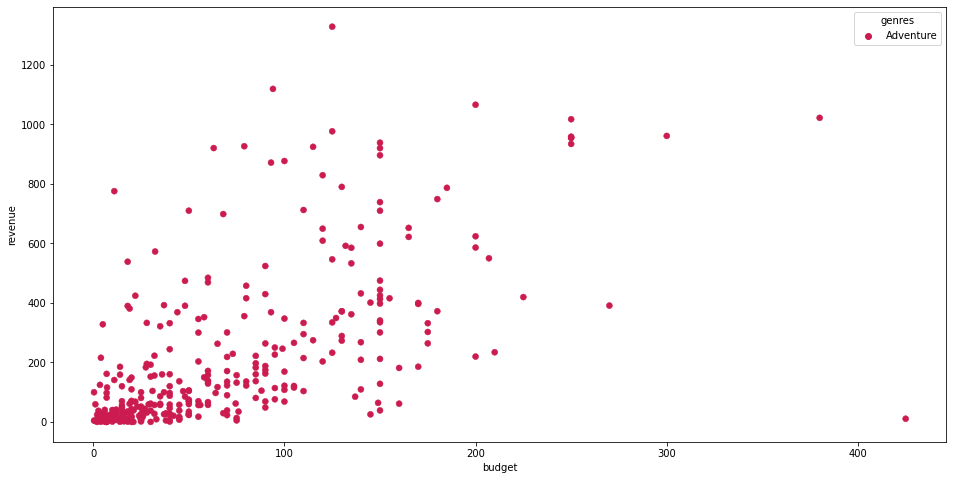

In [152]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_adventure.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [153]:
model4.coef_

array([2.53250827])

In [154]:
np.sqrt(mean_squared_error(df_adventure["revenue"], df_adventure["predict_revenue"]))

208.65436476740481

### Model log(e)

In [155]:
model_log4.coef_

array([0.9207831])

In [156]:
np.sqrt(mean_squared_error(df_adventure["revenue"], df_adventure["predict_revenue2"]))

233.64289209415847

### Model boxcox

In [157]:
model_boxcox4.coef_

array([0.94516562])

In [158]:
np.sqrt(mean_squared_error(df_adventure["revenue"], df_adventure["predict_revenue3"]))

220.59762561815236

# Horror

In [159]:
df_horror.budget.describe()

count    308.000000
mean      17.124123
std       19.642429
min        0.015000
25%        4.000000
50%       10.350000
75%       22.250000
max      160.000000
Name: budget, dtype: float64

In [160]:
df_horror.revenue.describe()

count    308.000000
mean      57.603363
std       75.222916
min        0.003010
25%       13.094133
50%       32.550669
75%       74.886360
max      672.806292
Name: revenue, dtype: float64

In [161]:
df_horror.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
59,2.550747,70.0,17.752940,Blackhat,133,Horror,Universal Pictures,584,5.0,2015,2.876551,4.248495,4.149986,6.129283,3.799562,7.138104,135.032908,64.522979,93.308099
6994,1.590381,70.0,57.958696,Sky Captain and the World of Tomorrow,107,Horror,Paramount Pictures,249,5.7,2004,4.059731,4.248495,5.856953,6.129283,6.053750,7.138104,135.032908,64.522979,93.308099
671,3.028769,70.0,215.529201,Dracula Untold,92,Horror,Universal Pictures,1666,6.1,2014,5.373096,4.248495,7.751740,6.129283,9.208545,7.138104,135.032908,64.522979,93.308099
2471,0.654013,75.0,14.010690,Virus,99,Horror,Universal Pictures,60,4.9,1999,2.639821,4.317488,3.808456,6.228819,3.404895,7.319949,142.354729,66.886388,97.792549
2779,0.323191,75.0,54.249294,Domestic Disturbance,89,Horror,Paramount Pictures,50,5.4,2001,3.993590,4.317488,5.761532,6.228819,5.914279,7.319949,142.354729,66.886388,97.792549
2904,1.611632,80.0,178.066569,Eagle Eye,118,Horror,DreamWorks SKG,645,6.2,2008,5.182157,4.382027,7.476273,6.321928,8.700865,7.492643,149.676551,69.175514,102.212374
2459,0.778786,80.0,91.188905,The Haunting,113,Horror,DreamWorks SKG,178,5.3,1999,4.512933,4.382027,6.510786,6.321928,7.056810,7.492643,149.676551,69.175514,102.212374
7089,0.572019,80.0,78.000586,Exorcist: The Beginning,114,Horror,Morgan Creek Productions,79,4.6,2004,4.356716,4.382027,6.285413,6.321928,6.701507,7.492643,149.676551,69.175514,102.212374
3957,1.064405,84.0,275.650703,Scooby-Doo,88,Horror,Atlas Entertainment,401,5.3,2002,5.619134,4.430817,8.106697,6.392317,9.889777,7.624881,155.534008,70.957916,105.705679
6974,2.499507,160.0,300.257475,Van Helsing,132,Horror,Universal Pictures,918,5.9,2004,5.704640,5.075174,8.230056,7.321928,10.133892,9.515445,266.825693,99.292059,167.259246


In [162]:
df_horror.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
2449,0.934621,0.025,248.000000,The Blair Witch Project,81,Horror,Artisan Entertainment,522,6.3,1999,5.513429,-3.688879,7.954196,-5.321928,9.593289,-2.501356,32.564018,1.028746,3.253188
3940,1.359987,48.000,249.348933,The Ring,115,Horror,DreamWorks SKG,810,6.4,2002,5.518853,3.871201,7.962022,5.584963,9.608363,6.192354,102.816894,53.000102,72.599765
762,1.018115,6.500,255.273813,Annabelle,99,Horror,New Line Cinema,827,5.6,2014,5.542337,1.871802,7.995902,2.700440,9.673796,2.330628,42.045776,18.685980,22.616843
3957,1.064405,84.000,275.650703,Scooby-Doo,88,Horror,Atlas Entertainment,401,5.3,2002,5.619134,4.430817,8.106697,6.392317,9.889777,7.624881,155.534008,70.957916,105.705679
6974,2.499507,160.000,300.257475,Van Helsing,132,Horror,Universal Pictures,918,5.9,2004,5.704640,5.075174,8.230056,7.321928,10.133892,9.515445,266.825693,99.292059,167.259246
5438,3.472358,13.000,318.000141,The Conjuring,112,Horror,New Line Cinema,1910,7.4,2013,5.762052,2.564949,8.312884,3.700440,10.299982,3.476858,51.564144,26.821188,32.848475
9613,0.865813,14.000,320.145693,Fatal Attraction,119,Horror,Paramount Pictures,131,6.4,1987,5.768776,2.639057,8.322585,3.807355,10.319551,3.610386,53.028508,27.877874,34.252168
639,6.438727,61.000,369.330363,Gone Girl,145,Horror,Twentieth Century Fox Film Corporation,3720,7.9,2014,5.911692,4.110874,8.528768,5.930737,10.741283,6.783744,121.853629,60.055151,85.050282
9806,2.563191,7.000,470.654000,Jaws,124,Horror,Universal Pictures,1415,7.3,1975,6.154123,1.945910,8.878523,2.807355,11.482720,2.444772,42.777958,19.422160,23.500899
2415,2.578731,40.000,672.806292,The Sixth Sense,107,Horror,Spyglass Entertainment,1753,7.5,1999,6.511457,3.688879,9.394047,5.321928,12.638122,5.763474,91.101979,48.193700,64.534510


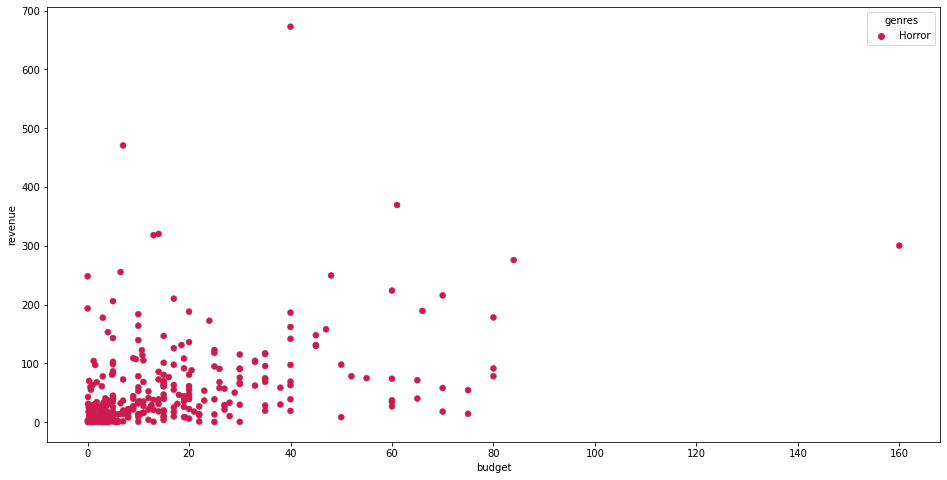

In [163]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_horror.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [164]:
model5.coef_

array([1.46436428])

In [165]:
np.sqrt(mean_squared_error(df_horror["revenue"], df_horror["predict_revenue"]))

69.3934637485108

### Model log(e)

In [166]:
model_log5.coef_

array([0.52141689])

In [167]:
np.sqrt(mean_squared_error(df_horror["revenue"], df_horror["predict_revenue2"]))

77.13081750188711

### Model boxcox

In [168]:
model_boxcox5.coef_

array([0.6008073])

In [169]:
np.sqrt(mean_squared_error(df_horror["revenue"], df_horror["predict_revenue3"]))

73.32308982887373

# Thriller

In [170]:
df_thriller.budget.describe()

count    177.000000
mean      36.714783
std       36.805721
min        0.250000
25%       12.000000
50%       25.000000
75%       50.200000
max      209.000000
Name: budget, dtype: float64

In [171]:
df_thriller.revenue.describe()

count    177.000000
mean      86.320729
std      122.501269
min        0.002521
25%       13.500000
50%       40.492759
75%      101.758490
max      758.239851
Name: revenue, dtype: float64

In [172]:
df_thriller.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
3991,0.722330,100.0,35.168966,K-19: The Widowmaker,138,Thriller,Paramount Pictures,146,6.0,2002,3.560164,4.605170,5.136231,6.643856,5.041419,8.109549,225.082269,122.607447,153.545599
6980,2.175284,110.0,362.744280,Ocean's Twelve,125,Thriller,Village Roadshow Pictures,1376,6.4,2004,5.893698,4.700480,8.502809,6.781360,10.687569,8.382689,247.008644,133.970566,169.029019
7402,2.148427,110.0,228.738393,Ghost Rider,114,Thriller,Columbia Pictures Corporation,986,5.2,2007,5.432579,4.700480,7.837555,6.781360,9.370406,8.382689,247.008644,133.970566,169.029019
1951,1.730679,110.0,177.238796,The A-Team,117,Thriller,20th Century Fox,1162,6.2,2010,5.177498,4.700480,7.469551,6.781360,8.688699,8.382689,247.008644,133.970566,169.029019
6558,3.655536,125.0,758.239851,The Da Vinci Code,149,Thriller,Columbia Pictures,1585,6.4,2006,6.631000,4.828314,9.566510,6.965784,13.042043,8.758405,279.898206,150.881832,192.383320
1401,2.841562,150.0,356.613439,Angels & Demons,138,Thriller,Columbia Pictures,1275,6.3,2009,5.876652,5.010635,8.478217,7.228819,10.636850,9.313426,334.714144,178.760036,231.636115
7009,1.319068,155.0,167.298192,Alexander,175,Thriller,France 3 CinÃ©ma,519,5.6,2004,5.119778,5.043425,7.386278,7.276124,8.538860,9.415696,345.677332,184.294820,239.533971
19,5.476958,160.0,650.523427,The Hunger Games: Mockingjay - Part 2,136,Thriller,Studio Babelsberg,2380,6.5,2015,6.477777,5.075174,9.345457,7.321928,12.525927,9.515445,356.640519,189.817106,247.447086
6969,3.177517,175.0,497.409852,Troy,163,Thriller,Plan B Entertainment,1598,6.8,2004,6.209414,5.164786,8.958291,7.451211,11.656534,9.800887,389.530082,206.313029,271.275914
4405,1.630455,209.0,303.025485,Battleship,131,Thriller,Universal Pictures,1523,5.5,2012,5.713817,5.342334,8.243295,7.707359,10.160321,10.383818,464.079757,243.350573,325.761861


In [173]:
df_thriller.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
1401,2.841562,150.0,356.613439,Angels & Demons,138,Thriller,Columbia Pictures,1275,6.3,2009,5.876652,5.010635,8.478217,7.228819,10.636850,9.313426,334.714144,178.760036,231.636115
2650,1.862114,100.0,362.211740,Planet of the Apes,119,Thriller,Twentieth Century Fox Film Corporation,702,5.5,2001,5.892229,4.605170,8.500689,6.643856,10.683191,8.109549,225.082269,122.607447,153.545599
6980,2.175284,110.0,362.744280,Ocean's Twelve,125,Thriller,Village Roadshow Pictures,1376,6.4,2004,5.893698,4.700480,8.502809,6.781360,10.687569,8.382689,247.008644,133.970566,169.029019
8271,0.740663,25.0,411.006740,The Bodyguard,129,Thriller,Tig Productions,338,6.1,1992,6.018610,3.218876,8.683018,4.643856,11.064173,4.736118,60.634456,33.778445,39.663383
2641,2.642249,85.0,450.717150,Ocean's Eleven,116,Thriller,Village Roadshow Pictures,2645,7.0,2001,6.110840,4.442651,8.816079,6.409391,11.347892,7.657177,192.192706,105.409796,130.454082
3376,4.504530,93.0,482.860185,Rise of the Planet of the Apes,105,Thriller,20th Century Fox,2578,6.9,2011,6.179727,4.532599,8.915462,6.539159,11.562988,7.905491,209.733806,114.606173,142.749344
6969,3.177517,175.0,497.409852,Troy,163,Thriller,Plan B Entertainment,1598,6.8,2004,6.209414,5.164786,8.958291,7.451211,11.656534,9.800887,389.530082,206.313029,271.275914
657,3.863074,58.8,542.307423,American Sniper,134,Thriller,Village Roadshow Pictures,3004,7.5,2014,6.295833,4.074142,9.082967,5.877744,11.931793,6.691015,134.745603,74.826003,90.516572
19,5.476958,160.0,650.523427,The Hunger Games: Mockingjay - Part 2,136,Thriller,Studio Babelsberg,2380,6.5,2015,6.477777,5.075174,9.345457,7.321928,12.525927,9.515445,356.640519,189.817106,247.447086
6558,3.655536,125.0,758.239851,The Da Vinci Code,149,Thriller,Columbia Pictures,1585,6.4,2006,6.631000,4.828314,9.566510,6.965784,13.042043,8.758405,279.898206,150.881832,192.383320


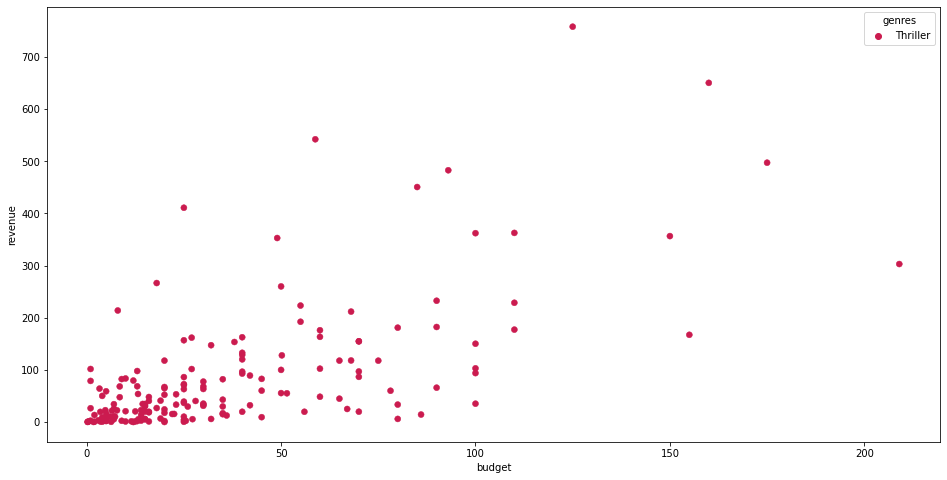

In [174]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_thriller.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [175]:
model6.coef_

array([2.25523876])

In [176]:
np.sqrt(mean_squared_error(df_thriller["revenue"], df_thriller["predict_revenue"]))

91.90116534302715

### Model log(e)

In [177]:
model_log6.coef_

array([0.86195114])

In [178]:
np.sqrt(mean_squared_error(df_thriller["revenue"], df_thriller["predict_revenue2"]))

106.62729519201785

### Model boxcox

In [179]:
model_boxcox6.coef_

array([0.88718571])

In [180]:
np.sqrt(mean_squared_error(df_thriller["revenue"], df_thriller["predict_revenue3"]))

99.35222003510178

# Crime

In [181]:
df_crime.budget.describe()

count    172.000000
mean      25.976160
std       22.218242
min        0.500000
25%        8.000000
50%       19.000000
75%       40.000000
max      100.000000
Name: budget, dtype: float64

In [182]:
df_crime.revenue.describe()

count     172.000000
mean       70.973157
std       113.223233
min         0.007306
25%         9.969993
50%        37.612955
75%        84.942660
max      1106.279658
Name: revenue, dtype: float64

In [183]:
df_crime.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
7440,1.196636,70.0,69.766619,The Brave One,122,Crime,Village Roadshow Pictures,115,6.3,2007,4.245156,4.248495,6.124465,6.129283,6.453992,7.138104,170.257428,84.477637,112.395922
6627,0.916551,70.0,38.629478,Basic Instinct 2,114,Crime,Intermedia Films,101,4.5,2006,3.654016,4.248495,5.271630,6.129283,5.224523,7.138104,170.257428,84.477637,112.395922
9044,0.576682,73.0,103.891409,Snake Eyes,98,Crime,Paramount Pictures,152,5.6,1998,4.643346,4.290459,6.698933,6.189825,7.361403,7.248371,177.023144,87.589221,117.056728
4087,0.299006,78.0,209.196298,Red Dragon,124,Crime,Universal Pictures,642,6.5,2002,5.343273,4.356709,7.708714,6.285402,9.128061,7.424596,188.299338,92.736457,124.831574
2196,0.326100,80.0,74.901339,Edge of Darkness,117,Crime,Icon Productions,276,6.0,2010,4.316172,4.382027,6.226920,6.321928,6.610960,7.492643,192.809815,94.782461,127.944035
27,4.503789,81.0,403.802136,Kingsman: The Secret Service,130,Crime,Twentieth Century Fox Film Corporation,3833,7.6,2015,6.000925,4.394449,8.657505,6.339850,11.010323,7.526174,195.065054,95.802808,129.500824
7425,1.414350,85.0,311.312624,Ocean's Thirteen,122,Crime,Village Roadshow Pictures,1371,6.4,2007,5.740798,4.442651,8.282220,6.409391,10.238288,7.657177,204.086009,99.867055,135.731807
2778,0.324227,87.0,351.692268,Hannibal,131,Crime,Universal Pictures,772,6.3,2001,5.862757,4.465908,8.458170,6.442943,10.595621,7.720897,208.596487,101.889218,138.849643
5286,0.737243,90.0,140.807547,The Devil's Own,107,Crime,Columbia Pictures,147,5.8,1997,4.947394,4.499810,7.137581,6.491853,8.100782,7.814385,215.362203,104.910500,143.529399
5428,4.877927,100.0,392.000694,The Wolf of Wall Street,180,Crime,Paramount Pictures,4027,7.9,2013,5.971264,4.605170,8.614712,6.643856,10.920400,8.109549,237.914591,114.884035,159.155394


In [184]:
df_crime.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
4377,2.944554,60.0,218.340595,Jack Reacher,130,Crime,Paramount Pictures,2281,6.2,2012,5.386056,4.094345,7.770437,5.906891,9.243659,6.741921,147.705040,73.966811,96.879285
9335,0.695385,19.0,272.742922,The Silence of the Lambs,118,Crime,Orion Pictures,2679,7.9,1991,5.608530,2.944439,8.091398,4.247928,9.859769,4.184868,55.240251,27.452413,33.167281
2425,1.560867,33.0,310.940086,Austin Powers: The Spy Who Shagged Me,95,Crime,New Line Cinema,583,6.0,1999,5.739600,3.496508,8.280493,5.044394,10.234819,5.329731,86.813594,44.181680,55.033562
7425,1.414350,85.0,311.312624,Ocean's Thirteen,122,Crime,Village Roadshow Pictures,1371,6.4,2007,5.740798,4.442651,8.282220,6.409391,10.238288,7.657177,204.086009,99.867055,135.731807
16,5.749758,48.0,325.771424,Taken 3,109,Crime,Twentieth Century Fox Film Corporation,1578,6.1,2015,5.786196,3.871201,8.347716,5.584963,10.370360,6.192354,120.642175,61.024637,78.286347
8067,4.765359,33.0,327.311859,Se7en,127,Crime,New Line Cinema,3535,7.9,1995,5.790913,3.496508,8.354522,5.044394,10.384148,5.329731,86.813594,44.181680,55.033562
2778,0.324227,87.0,351.692268,Hannibal,131,Crime,Universal Pictures,772,6.3,2001,5.862757,4.465908,8.458170,6.442943,10.595621,7.720897,208.596487,101.889218,138.849643
5428,4.877927,100.0,392.000694,The Wolf of Wall Street,180,Crime,Paramount Pictures,4027,7.9,2013,5.971264,4.605170,8.614712,6.643856,10.920400,8.109549,237.914591,114.884035,159.155394
27,4.503789,81.0,403.802136,Kingsman: The Secret Service,130,Crime,Twentieth Century Fox Film Corporation,3833,7.6,2015,6.000925,4.394449,8.657505,6.339850,11.010323,7.526174,195.065054,95.802808,129.500824
8094,1.136610,22.0,1106.279658,The Net,114,Crime,Columbia Pictures,201,5.6,1995,7.008758,3.091042,10.111500,4.459432,14.378873,4.475083,62.005968,31.150151,37.882589


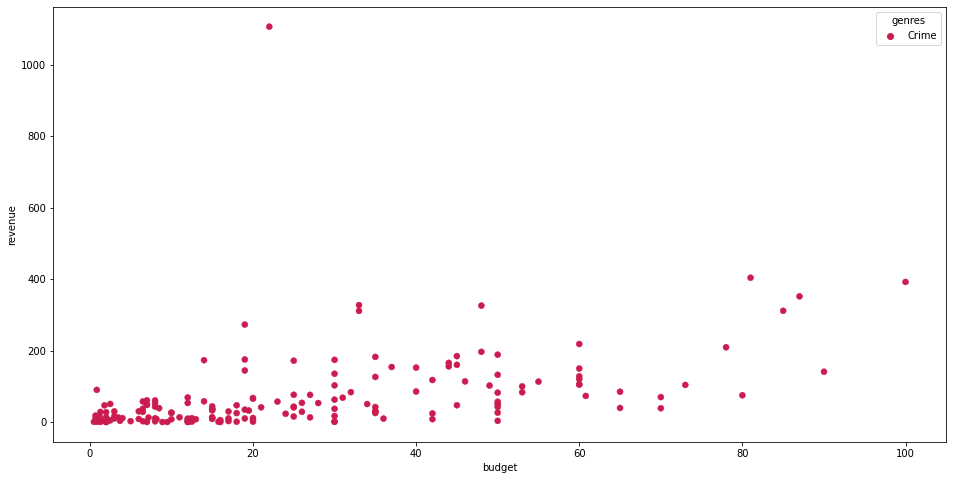

In [185]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_crime.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [186]:
model7.coef_

array([2.19263751])

In [187]:
np.sqrt(mean_squared_error(df_crime["revenue"], df_crime["predict_revenue"]))

101.23640742907469

### Model log(e)

In [188]:
model_log7.coef_

array([0.9299359])

In [189]:
np.sqrt(mean_squared_error(df_crime["revenue"], df_crime["predict_revenue2"]))

110.30361037936206

### Model boxcox

In [190]:
model_boxcox7.coef_

array([0.90189703])

In [191]:
np.sqrt(mean_squared_error(df_crime["revenue"], df_crime["predict_revenue3"]))

105.93567061909582

# Fantasy

In [192]:
df_fantasy.budget.describe()

count    136.000000
mean      51.684191
std       48.636859
min        1.100000
25%       18.000000
50%       34.000000
75%       67.000000
max      258.000000
Name: budget, dtype: float64

In [193]:
df_fantasy.revenue.describe()

count    136.000000
mean     145.592036
std      181.529757
min        0.006399
25%       24.328812
50%       79.890621
75%      183.818667
max      890.871626
Name: revenue, dtype: float64

In [194]:
df_fantasy.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
2899,1.800286,150.0,624.029371,Hancock,92,Fantasy,Columbia Pictures,1764,6.0,2008,6.436197,5.010635,9.285470,7.228819,12.388378,9.313426,421.158989,286.604396,328.831466
1941,2.053855,150.0,215.283742,The Sorcerer's Apprentice,109,Fantasy,Walt Disney Pictures,871,5.8,2010,5.371957,5.010635,7.750096,7.228819,9.205462,9.313426,421.158989,286.604396,328.831466
1430,1.324927,150.0,292.817841,G-Force,88,Fantasy,Walt Disney Pictures,340,5.1,2009,5.679551,5.010635,8.193860,7.228819,10.061861,9.313426,421.158989,286.604396,328.831466
2885,2.537342,150.0,333.932083,The Curious Case of Benjamin Button,166,Fantasy,Paramount Pictures,1899,7.2,2008,5.810938,5.010635,8.383411,7.228819,10.442807,9.313426,421.158989,286.604396,328.831466
7411,1.862295,160.0,798.958165,Shrek the Third,93,Fantasy,DreamWorks Animation,1277,5.8,2007,6.683309,5.075174,9.641976,7.321928,13.221622,9.515445,449.187742,307.763301,353.142678
1926,3.560424,165.0,494.878759,How to Train Your Dragon,98,Fantasy,DreamWorks Animation,2949,7.4,2010,6.204313,5.105945,8.950931,7.366322,11.640422,9.612810,463.202119,318.394829,365.371690
7448,1.109374,175.0,173.000000,Evan Almighty,96,Fantasy,Columbia Pictures,683,5.2,2007,5.153292,5.164786,7.434628,7.451211,8.625665,9.800887,491.230872,339.757357,389.971184
660,3.582315,180.0,758.410378,Maleficent,97,Fantasy,Walt Disney Pictures,2928,7.0,2014,6.631225,5.192957,9.566835,7.491853,13.042811,9.891823,505.245248,350.486636,402.339687
5520,1.094958,200.0,491.868548,Oz: The Great and Powerful,130,Fantasy,Walt Disney Pictures,2855,5.6,2013,6.198212,5.298317,8.942129,7.643856,11.621173,10.237110,561.302755,393.705836,452.251069
7394,2.520912,258.0,890.871626,Spider-Man 3,139,Fantasy,Columbia Pictures,2083,5.8,2007,6.792200,5.552960,9.799074,8.011227,13.601083,11.106414,723.869523,521.464216,600.580976


In [195]:
df_fantasy.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
5520,1.094958,200.0,491.868548,Oz: The Great and Powerful,130,Fantasy,Walt Disney Pictures,2855,5.6,2013,6.198212,5.298317,8.942129,7.643856,11.621173,10.237110,561.302755,393.705836,452.251069
1926,3.560424,165.0,494.878759,How to Train Your Dragon,98,Fantasy,DreamWorks Animation,2949,7.4,2010,6.204313,5.105945,8.950931,7.366322,11.640422,9.612810,463.202119,318.394829,365.371690
9986,1.513223,22.0,505.000000,Ghost,127,Fantasy,Paramount Pictures,714,6.7,1990,6.224558,3.091042,8.980140,4.459432,11.704453,4.475083,62.390949,34.451019,41.473659
2637,3.204295,115.0,562.816256,"Monsters, Inc.",92,Fantasy,Walt Disney Pictures,3899,7.3,2001,6.332953,4.744932,9.136520,6.845490,12.051387,8.512107,323.058353,213.761044,245.416563
663,3.489106,145.0,609.123048,How to Train Your Dragon 2,102,Fantasy,DreamWorks Animation,2152,7.7,2014,6.412020,4.976734,9.250590,7.179909,12.308884,9.208483,407.144612,276.079069,316.751578
2899,1.800286,150.0,624.029371,Hancock,92,Fantasy,Columbia Pictures,1764,6.0,2008,6.436197,5.010635,9.285470,7.228819,12.388378,9.313426,421.158989,286.604396,328.831466
660,3.582315,180.0,758.410378,Maleficent,97,Fantasy,Walt Disney Pictures,2928,7.0,2014,6.631225,5.192957,9.566835,7.491853,13.042811,9.891823,505.245248,350.486636,402.339687
7411,1.862295,160.0,798.958165,Shrek the Third,93,Fantasy,DreamWorks Animation,1277,5.8,2007,6.683309,5.075174,9.641976,7.321928,13.221622,9.515445,449.187742,307.763301,353.142678
3916,3.241129,139.0,821.708551,Spider-Man,121,Fantasy,Columbia Pictures,3170,6.6,2002,6.711386,4.934474,9.682483,7.118941,13.318733,9.078789,390.327361,263.498360,302.324639
7394,2.520912,258.0,890.871626,Spider-Man 3,139,Fantasy,Columbia Pictures,2083,5.8,2007,6.792200,5.552960,9.799074,8.011227,13.601083,11.106414,723.869523,521.464216,600.580976


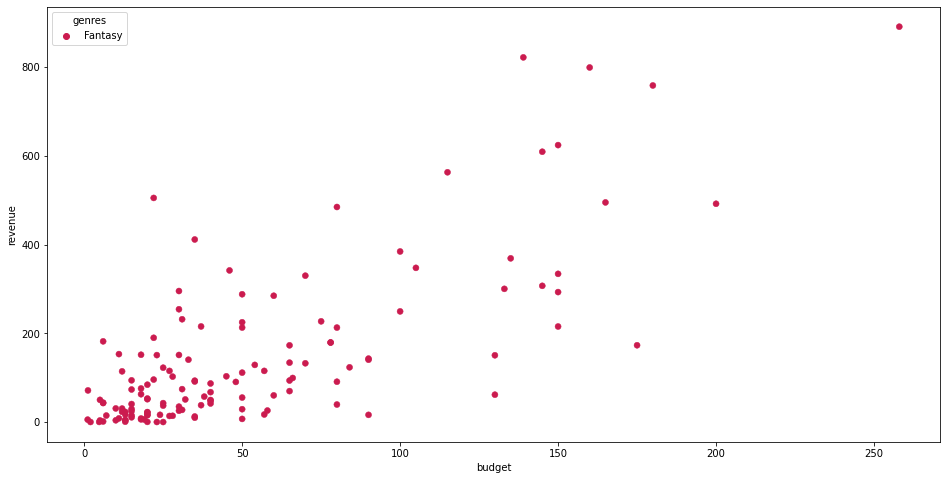

In [196]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_fantasy.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [197]:
model8.coef_

array([2.80287531])

In [198]:
np.sqrt(mean_squared_error(df_fantasy["revenue"], df_fantasy["predict_revenue"]))

119.42957428104314

### Model log(e)

In [199]:
model_log8.coef_

array([1.10365295])

In [200]:
np.sqrt(mean_squared_error(df_fantasy["revenue"], df_fantasy["predict_revenue2"]))

136.41722116853842

### Model boxcox

In [201]:
model_boxcox8.coef_

array([1.04011588])

In [202]:
np.sqrt(mean_squared_error(df_fantasy["revenue"], df_fantasy["predict_revenue3"]))

127.6487477386046

# Romance

In [203]:
df_romance.budget.describe()

count    104.000000
mean      40.659669
std       40.683849
min        1.500000
25%       12.000000
50%       25.000000
75%       52.125000
max      200.000000
Name: budget, dtype: float64

In [204]:
df_romance.revenue.describe()

count     104.000000
mean      148.262605
std       199.499021
min         0.088273
25%        26.285990
50%        84.163537
75%       174.852247
max      1156.730962
Name: revenue, dtype: float64

In [205]:
df_romance.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
1402,2.463982,105.0,267.045765,The Princess and the Frog,97,Romance,Walt Disney Pictures,706,6.5,2009,5.587420,4.653960,8.060943,6.714246,9.800212,8.248636,331.639930,255.104428,264.338891
8977,2.005566,120.0,363.398565,A Bug's Life,95,Romance,Walt Disney Pictures,1159,6.6,1998,5.895500,4.787492,8.505409,6.906891,10.692941,8.637242,374.391651,291.451087,301.323501
2963,0.879116,120.0,93.945766,Speed Racer,135,Romance,Village Roadshow Pictures,194,5.6,2008,4.542718,4.787492,6.553756,6.906891,7.125728,8.637242,374.391651,291.451087,301.323501
3932,1.594587,120.0,169.956806,Stuart Little 2,78,Romance,Columbia Pictures,366,5.4,2002,5.135544,4.787492,7.409024,6.906891,8.579630,8.637242,374.391651,291.451087,301.323501
8663,2.977558,123.0,345.141403,How the Grinch Stole Christmas,104,Romance,Imagine Entertainment,733,6.1,2000,5.843954,4.812184,8.431044,6.942515,10.540003,8.710398,382.941995,298.719014,308.735584
672,3.007018,132.0,373.552094,Penguins of Madagascar,92,Romance,DreamWorks Animation,939,6.5,2014,5.923057,4.882802,8.545166,7.044394,10.775305,8.921885,408.593028,320.520191,331.002873
7415,1.713611,150.0,287.594577,Bee Movie,91,Romance,Pacific Data Images (PDI),723,5.6,2007,5.661552,5.010635,8.167893,7.228819,10.010392,9.313426,459.895093,364.111681,375.678938
2889,2.217084,150.0,603.900354,Madagascar: Escape 2 Africa,89,Romance,DreamWorks Animation,1147,6.1,2008,6.403409,5.010635,9.238167,7.228819,12.280657,9.313426,459.895093,364.111681,375.678938
4379,2.858742,165.0,471.222889,Wreck-It Ralph,108,Romance,Walt Disney Animation Studios,3492,7.0,2012,6.155331,5.105945,8.880266,7.366322,11.486499,9.612810,502.646813,400.427895,413.054042
1921,5.572950,200.0,1025.467110,Alice in Wonderland,108,Romance,Walt Disney Pictures,2853,6.3,2010,6.932904,5.298317,10.002066,7.643856,14.102875,10.237110,602.400829,485.134924,500.771120


In [206]:
df_romance.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
672,3.007018,132.0,373.552094,Penguins of Madagascar,92,Romance,DreamWorks Animation,939,6.5,2014,5.923057,4.882802,8.545166,7.044394,10.775305,8.921885,408.593028,320.520191,331.002873
9316,3.852269,25.0,377.350553,Beauty and the Beast,84,Romance,Walt Disney Pictures,1703,7.3,1991,5.933175,3.218876,8.559762,4.643856,10.805649,4.736118,103.630753,60.956378,68.200116
9983,2.212092,14.0,463.000000,Pretty Woman,119,Romance,Touchstone Pictures,963,6.9,1990,6.137727,2.639057,8.854868,3.807355,11.431518,3.610386,72.279491,34.184844,40.643874
4379,2.858742,165.0,471.222889,Wreck-It Ralph,108,Romance,Walt Disney Animation Studios,3492,7.0,2012,6.155331,5.105945,8.880266,7.366322,11.486499,9.612810,502.646813,400.427895,413.054042
6199,2.444998,75.0,532.680671,Madagascar,86,Romance,DreamWorks SKG,2107,6.4,2005,6.277922,4.317488,9.057127,6.228819,11.874381,7.319949,246.136489,182.370035,190.714633
18,5.556818,95.0,542.351353,Cinderella,112,Romance,Walt Disney Pictures,1495,6.8,2015,6.295914,4.553877,9.083084,6.569856,11.932053,7.964974,303.138783,230.866241,239.749911
2889,2.217084,150.0,603.900354,Madagascar: Escape 2 Africa,89,Romance,DreamWorks Animation,1147,6.1,2008,6.403409,5.010635,9.238167,7.228819,12.280657,9.313426,459.895093,364.111681,375.678938
4180,4.782688,45.0,788.241776,The Lion King,89,Romance,Walt Disney Pictures,3489,7.7,1994,6.669805,3.806662,9.622494,5.491853,13.175096,6.038511,160.633047,109.561160,117.357203
1921,5.572950,200.0,1025.467110,Alice in Wonderland,108,Romance,Walt Disney Pictures,2853,6.3,2010,6.932904,5.298317,10.002066,7.643856,14.102875,10.237110,602.400829,485.134924,500.771120
8,7.404165,74.0,1156.730962,Minions,91,Romance,Universal Pictures,2893,6.5,2015,7.053353,4.304065,10.175838,6.209453,14.542953,7.284347,243.286374,179.944443,188.267103


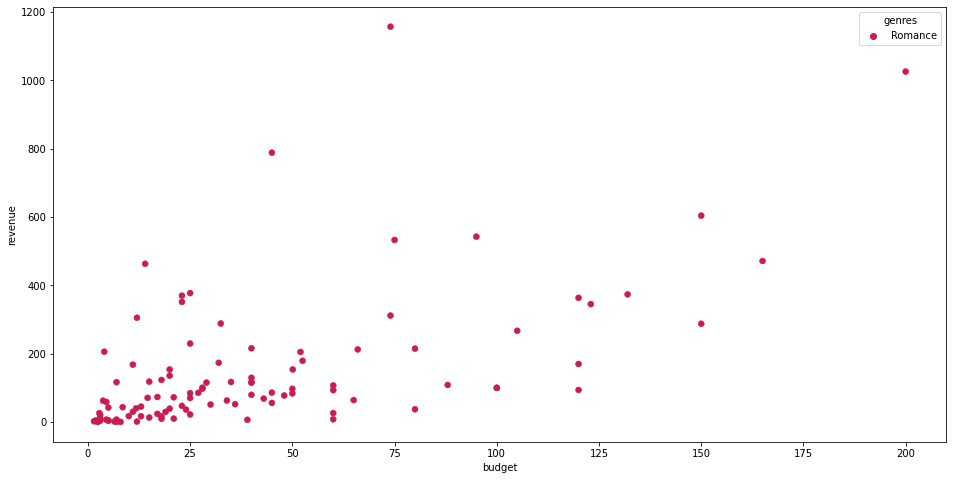

In [207]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_romance.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [208]:
model9.coef_

array([3.19559296])

In [209]:
np.sqrt(mean_squared_error(df_romance["revenue"], df_romance["predict_revenue"]))

161.55867072494922

### Model log(e)

In [210]:
model_log9.coef_

array([1.18195176])

In [211]:
np.sqrt(mean_squared_error(df_romance["revenue"], df_romance["predict_revenue2"]))

169.8020203619687

### Model boxcox

In [212]:
model_boxcox9.coef_

array([1.2005768])

In [213]:
np.sqrt(mean_squared_error(df_romance["revenue"], df_romance["predict_revenue3"]))

167.57786036566677

# Animation

In [214]:
df_animation.budget.describe()

count    102.000000
mean      79.815686
std       55.752144
min        1.200000
25%       35.250000
50%       75.000000
75%      108.250000
max      260.000000
Name: budget, dtype: float64

In [215]:
df_animation.revenue.describe()

count     102.000000
mean      278.839161
std       271.487735
min         0.073706
25%        57.706529
50%       206.074006
75%       382.820319
max      1274.219009
Name: revenue, dtype: float64

In [216]:
df_animation.sort_values('budget').head(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
1370,0.175657,1.2,9.000000,Wizards,80,Animation,20th Century Fox,26,6.0,1977,2.197225,0.182322,3.169925,0.263034,2.711884,0.186135,27.615427,1.337916,1.500789
8046,0.196581,1.2,0.760883,Fire and Ice,81,Animation,Polyc International BV,20,6.1,1983,-0.273276,0.182322,-0.394253,0.263034,-0.266473,0.186135,27.615427,1.337916,1.500789
819,0.725460,3.5,5.155325,Justice League: War,79,Animation,DC Comics,141,7.0,2014,1.640030,1.252763,2.366063,1.807355,1.916485,1.448362,34.965291,4.741357,5.234054
10648,1.936962,4.0,55.675257,The Aristocats,78,Animation,Walt Disney Productions,625,7.0,1970,4.019536,1.386294,5.798964,2.000000,5.968787,1.628361,36.563087,5.551960,6.122168
10283,0.565312,6.0,5.617391,Batman: Mask of the Phantasm,76,Animation,DC Comics,98,7.2,1993,1.725867,1.791759,2.489900,2.584963,2.033732,2.209474,42.954273,8.965566,9.864247
144,1.125239,8.0,3.759286,Anomalisa,90,Animation,Starburns Industries,259,6.7,2015,1.324229,2.079442,1.910459,3.000000,1.500825,2.655338,49.345459,12.596481,13.850143
6658,0.715451,8.5,5.480996,A Scanner Darkly,100,Animation,Thousand Words,282,6.7,2006,1.701287,2.140066,2.454438,3.087463,1.999966,2.753057,50.943256,13.532212,14.878377
7045,0.845493,10.0,1.461989,ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰,101,Animation,Toho Company,77,6.7,2004,0.379798,2.302585,0.547932,3.321928,0.393480,3.021727,55.736645,16.398050,18.030102
2782,0.501163,10.0,44.460850,Recess: School's Out,83,Animation,N,42,6.5,2001,3.794609,2.302585,5.474464,3.321928,5.504847,3.021727,55.736645,16.398050,18.030102
9462,1.101103,12.3,84.460846,The Land Before Time,69,Animation,Universal Pictures,340,6.9,1988,4.436288,2.509599,6.400211,3.620586,6.881202,3.378579,63.086509,20.943811,23.036967


In [217]:
df_animation.sort_values('revenue').head(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
4859,0.111351,65.0,0.073706,Foodfight!,87,Animation,Threshold Entertainment,12,2.2,2012,-2.607671,4.174387,-3.762074,6.022368,-2.068014,6.945914,231.494258,149.836143,167.196162
8046,0.196581,1.2,0.760883,Fire and Ice,81,Animation,Polyc International BV,20,6.1,1983,-0.273276,0.182322,-0.394253,0.263034,-0.266473,0.186135,27.615427,1.337916,1.500789
7045,0.845493,10.0,1.461989,ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰,101,Animation,Toho Company,77,6.7,2004,0.379798,2.302585,0.547932,3.321928,0.393480,3.021727,55.736645,16.398050,18.030102
5332,0.425112,32.0,3.566637,Cats Don't Dance,75,Animation,Warner Bros. Animation,10,7.1,1997,1.271623,3.465736,1.834564,5.000000,1.433918,5.262085,126.039690,64.841808,71.750428
144,1.125239,8.0,3.759286,Anomalisa,90,Animation,Starburns Industries,259,6.7,2015,1.324229,2.079442,1.910459,3.000000,1.500825,2.655338,49.345459,12.596481,13.850143
8225,0.183320,28.0,3.983912,The Pebble and the Penguin,74,Animation,N,11,4.8,1995,1.382264,3.332205,1.994186,4.807355,1.575399,4.973934,113.257319,55.374706,61.199595
819,0.725460,3.5,5.155325,Justice League: War,79,Animation,DC Comics,141,7.0,2014,1.640030,1.252763,2.366063,1.807355,1.916485,1.448362,34.965291,4.741357,5.234054
6658,0.715451,8.5,5.480996,A Scanner Darkly,100,Animation,Thousand Words,282,6.7,2006,1.701287,2.140066,2.454438,3.087463,1.999966,2.753057,50.943256,13.532212,14.878377
10283,0.565312,6.0,5.617391,Batman: Mask of the Phantasm,76,Animation,DC Comics,98,7.2,1993,1.725867,1.791759,2.489900,2.584963,2.033732,2.209474,42.954273,8.965566,9.864247
1370,0.175657,1.2,9.000000,Wizards,80,Animation,20th Century Fox,26,6.0,1977,2.197225,0.182322,3.169925,0.263034,2.711884,0.186135,27.615427,1.337916,1.500789


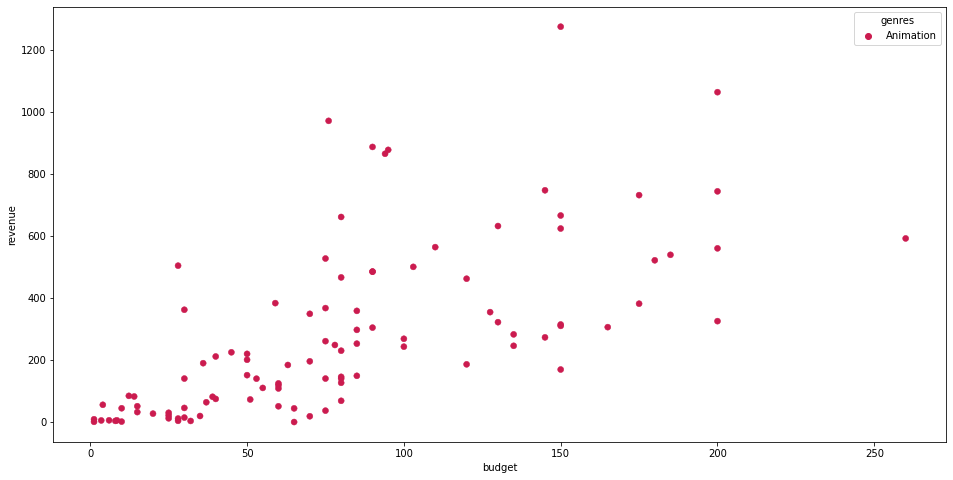

In [218]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_animation.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [219]:
model10.coef_

array([3.25834633])

In [220]:
np.sqrt(mean_squared_error(df_animation["revenue"], df_animation["predict_revenue"]))

203.8449863148453

### Model log(e)

In [221]:
model_log10.coef_

array([0.71268666])

In [222]:
np.sqrt(mean_squared_error(df_animation["revenue"], df_animation["predict_revenue2"]))

220.82997052907

### Model boxcox

In [223]:
model_boxcox10.coef_

array([0.90293093])

In [224]:
np.sqrt(mean_squared_error(df_animation["revenue"], df_animation["predict_revenue3"]))

213.19562437763747

# Science Fiction

In [225]:
df_science.budget.describe()

count     96.000000
mean      53.636531
std       53.603937
min        0.007000
25%       12.000000
50%       32.500000
75%       84.750000
max      220.000000
Name: budget, dtype: float64

In [226]:
df_science.revenue.describe()

count      96.000000
mean      177.487388
std       258.331117
min         0.014000
25%        26.235329
50%        79.629063
75%       172.626931
max      1519.557910
Name: revenue, dtype: float64

In [227]:
df_science.sort_values('budget').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
17,5.573184,130.000000,518.602163,Ant-Man,115,Science Fiction,Marvel Studios,3779,7.0,2015,6.251137,4.867534,9.018484,7.022368,11.788878,8.875875,426.306016,186.917617,282.118157
8997,1.170499,130.000000,379.014294,Godzilla,139,Science Fiction,TriStar Pictures,582,5.1,1998,5.937574,4.867534,8.566108,7.022368,10.818861,8.875875,426.306016,186.917617,282.118157
2887,2.349544,150.000000,163.712074,The Incredible Hulk,114,Science Fiction,Universal Pictures,1868,6.1,2008,5.098109,5.010635,7.355017,7.228819,8.483022,9.313426,491.472943,206.986595,323.583310
1487,0.813323,150.000000,836.297228,Transformers: Revenge of the Fallen,150,Science Fiction,Paramount Pictures,2230,6.0,2009,6.728984,5.010635,9.707872,7.228819,13.379858,9.313426,491.472943,206.986595,323.583310
1391,3.829570,150.000000,385.680446,Star Trek,127,Science Fiction,Paramount Pictures,3417,7.3,2009,5.955009,5.010635,8.591262,7.228819,10.871331,9.313426,491.472943,206.986595,323.583310
6,8.654359,155.000000,440.603537,Terminator Genisys,125,Science Fiction,Paramount Pictures,2598,5.8,2015,6.088145,5.043425,8.783337,7.276124,11.277629,9.415696,507.764674,211.880598,333.957076
651,4.452507,170.000000,708.200000,Dawn of the Planet of the Apes,130,Science Fiction,Ingenious Media,2625,7.4,2014,6.562727,5.135798,9.468013,7.409391,12.810260,9.707919,556.639869,226.298774,365.101412
11,6.189369,176.000003,183.987723,Jupiter Ascending,124,Science Fiction,Village Roadshow Pictures,1937,5.2,2015,5.214869,5.170484,7.523466,7.459432,8.786570,9.819234,576.189957,231.962583,377.569891
648,4.983782,210.000000,245.500000,Transformers: Age of Extinction,165,Science Fiction,Paramount Pictures,2161,5.9,2014,5.503297,5.347108,7.939579,7.714246,9.565175,10.399815,686.973722,263.078720,448.358100
4361,7.637767,220.000000,1519.557910,The Avengers,143,Science Fiction,Marvel Studios,8903,7.3,2012,7.326175,5.393628,10.569436,7.781360,15.576813,10.556632,719.557186,271.947083,469.225004


In [228]:
df_science.sort_values('revenue').tail(10)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
17,5.573184,130.0,518.602163,Ant-Man,115,Science Fiction,Marvel Studios,3779,7.0,2015,6.251137,4.867534,9.018484,7.022368,11.788878,8.875875,426.306016,186.917617,282.118157
4382,2.571099,75.0,691.210692,The Hunger Games,142,Science Fiction,Lionsgate,7080,6.7,2012,6.538445,4.317488,9.432982,6.228819,12.728529,7.319949,247.096968,126.299653,168.067518
651,4.452507,170.0,708.200000,Dawn of the Planet of the Apes,130,Science Fiction,Ingenious Media,2625,7.4,2014,6.562727,5.135798,9.468013,7.409391,12.810260,9.707919,556.639869,226.298774,365.101412
5423,5.242753,105.0,716.392705,Gravity,91,Science Fiction,Warner Bros.,3775,7.4,2013,6.574228,4.653960,9.484607,6.714246,12.849103,8.248636,344.847358,160.526102,230.318337
633,10.739009,125.0,752.100229,The Hunger Games: Mockingjay - Part 1,123,Science Fiction,Lionsgate,3590,6.6,2014,6.622870,4.828314,9.554781,6.965784,13.014287,8.758405,410.014284,181.765227,271.757276
8889,2.900556,10.5,792.910554,E.T. the Extra-Terrestrial,115,Science Fiction,Universal Pictures,1830,7.2,1982,6.675710,2.351375,9.631014,3.392317,13.195429,3.104333,36.933629,31.107063,30.093630
1487,0.813323,150.0,836.297228,Transformers: Revenge of the Fallen,150,Science Fiction,Paramount Pictures,2230,6.0,2009,6.728984,5.010635,9.707872,7.228819,13.379858,9.313426,491.472943,206.986595,323.583310
5427,4.921275,130.0,847.423452,The Hunger Games: Catching Fire,146,Science Fiction,Lionsgate,4269,7.4,2013,6.742201,4.867534,9.726939,7.022368,13.425895,8.875875,426.306016,186.917617,282.118157
6196,3.457537,113.0,850.000000,Star Wars: Episode III - Revenge of the Sith,140,Science Fiction,Lucasfilm,2629,7.0,2005,6.745236,4.727388,9.731319,6.820179,13.436486,8.460872,370.914128,169.150244,246.894587
4361,7.637767,220.0,1519.557910,The Avengers,143,Science Fiction,Marvel Studios,8903,7.3,2012,7.326175,5.393628,10.569436,7.781360,15.576813,10.556632,719.557186,271.947083,469.225004


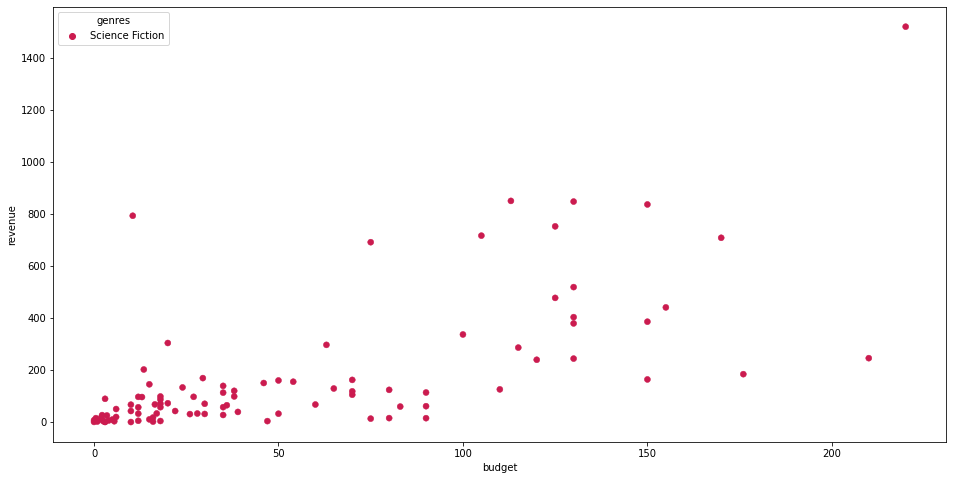

In [229]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_science.sort_values("revenue", ascending=False),
    x="budget",
    y="revenue",
    hue="genres",
    edgecolor=None,
    palette="rocket",
    );

### Model 1

In [230]:
model11.coef_

array([2.85011472])

In [231]:
np.sqrt(mean_squared_error(df_science["revenue"], df_science["predict_revenue"]))

189.34466130036418

### Model log(e)

In [232]:
model_log11.coef_

array([0.99751232])

In [233]:
np.sqrt(mean_squared_error(df_science["revenue"], df_science["predict_revenue2"]))

235.5723399793615

### Model boxcox

In [234]:
model_boxcox11.coef_

array([0.95866273])

In [235]:
np.sqrt(mean_squared_error(df_science["revenue"], df_science["predict_revenue3"]))

206.96069017448286

In [236]:
df_movies_corr = pd.concat(
    [df_drama, df_comedy, df_action, df_adventure, df_horror, df_crime, df_thriller, df_fantasy,
    df_animation, df_science, df_romance, df_family, df_mystery, df_documentary, df_music, df_war, 
    df_history, df_western]
)
df_movies_corr

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
7,7.667400,108.0,595.380321,The Martian,141,Drama,Twentieth Century Fox Film Corporation,4572,7.6,2015,6.389200,4.682131,9.217668,6.754888,12.234179,8.329645,278.354493,112.027893,164.095509
12,6.118847,15.0,36.869414,Ex Machina,108,Drama,DNA Films,2854,7.6,2015,3.607382,2.708050,5.204353,3.906891,5.133143,3.736726,40.481427,20.559208,24.899642
23,4.710402,40.0,569.651467,Fifty Shades of Grey,125,Drama,Focus Features,1865,5.3,2015,6.345025,3.688879,9.153936,5.321928,12.090456,5.763474,104.425800,47.736383,62.105641
28,4.062293,20.0,88.346473,Spotlight,128,Drama,Participant Media,1559,7.8,2015,4.481266,2.995732,6.465101,4.321928,6.983953,4.285314,53.270302,26.321460,32.391971
35,3.557846,6.0,35.401758,Room,117,Drama,Element Pictures,1520,8.0,2015,3.566761,1.791759,5.145749,2.584963,5.054187,2.209474,17.461453,9.359135,11.098262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,0.634017,7.0,116.700000,The Piano,121,Romance,New South Wales Film & Television Office,131,6.8,1993,4.759607,1.945910,6.866661,2.807355,7.639216,2.444772,52.328688,17.121921,22.440190
10303,0.475609,15.0,118.243066,Beethoven's 2nd,89,Romance,Universal Pictures,84,5.0,1993,4.772742,2.708050,6.885612,3.906891,7.670983,3.736726,75.129606,36.620333,43.184110
10398,2.550704,4.0,205.843612,The Jungle Book,78,Romance,Walt Disney Pictures,928,7.0,1967,5.327117,1.386294,7.685405,2.000000,9.084645,1.628361,43.778344,9.797585,14.183767
10539,0.347800,2.7,3.500000,The Wraith,93,Romance,New Century Entertainment Corporation,48,5.9,1986,1.252763,0.993252,1.807355,1.432959,1.410088,1.113722,40.073195,6.619839,10.396818


In [237]:
np.sqrt(mean_squared_error(df_movies_corr["revenue"], df_movies_corr["predict_revenue"]))

126.97127355681305

# Drama model changes

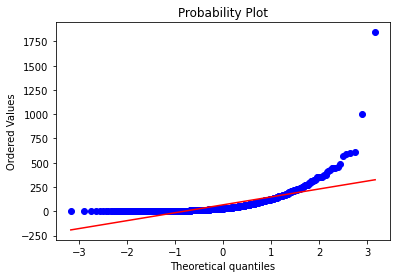

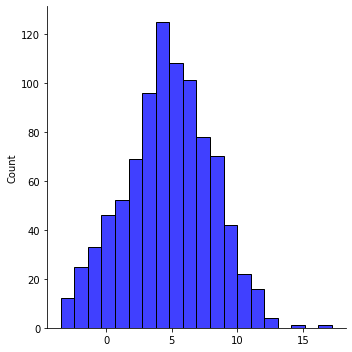

In [238]:
fig, ax = plt.subplots()

stats.probplot(df_drama['revenue'], plot=ax)
sns.displot(boxcox(df_drama["revenue"])[0], color='blue', bins=20, kde=False)

In [239]:
df_drama.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,0.941679,25.021985,66.115410,117.945616,385.075472,6.437736,2002.024417,2.966696,2.642133,4.280037,3.811792,4.569167,3.932679,66.115410,30.246247,39.637986
std,0.989338,25.878890,110.754413,22.286925,723.340368,0.745562,11.207808,2.069629,1.304752,2.985843,1.882359,3.202338,2.133824,66.192374,26.629660,38.945877
min,0.028227,0.008000,0.003003,66.000000,10.000000,3.800000,1960.000000,-5.808143,-4.828314,-8.379380,-6.965784,-3.557244,-2.937265,2.135266,0.031768,0.159669
25%,0.405537,8.000000,8.038061,102.000000,52.000000,5.900000,1997.000000,2.084188,2.079442,3.006848,3.000000,2.543817,2.655338,22.577003,11.982276,14.231414
50%,0.658866,16.500000,28.607524,114.000000,145.000000,6.500000,2005.000000,3.353670,2.803360,4.838323,4.044394,4.649585,3.914534,44.318090,22.312923,27.154094
75%,1.087374,32.000000,82.466670,129.000000,403.000000,6.900000,2010.000000,4.412394,3.465736,6.365739,5.000000,6.826964,5.262085,83.963601,39.411083,50.235631
max,8.947905,200.000000,1845.034188,248.000000,8432.000000,8.400000,2015.000000,7.520253,5.298317,10.849432,7.643856,16.344745,10.237110,513.669783,190.177755,306.109324


# Drama revenue model with more var

### var variável dependente: 'budget', 'vote_count', 'runtime'


### variável dependente: price_log

In [240]:
f = df_drama[['budget', 'vote_count', 'runtime']]
g = df_drama.revenue

modeldrama = LinearRegression()
modeldrama.fit(f, g)

np.sqrt(mean_squared_error(df_drama.revenue, modeldrama.predict(f)))

74.71215820656478

###  var variável dependente: 'budget', 'vote_count', 'runtime', 'release_year'


### variável dependente: price_log

In [241]:
m = df_drama[['budget', 'vote_count', 'runtime', 'release_year']]
n = df_drama.revenue

modeldrama = LinearRegression()
modeldrama.fit(m, n)

np.sqrt(mean_squared_error(df_drama.revenue, modeldrama.predict(m)))

73.82264563639532

###  var variável dependente: 'budget', 'vote_count', 'runtime',  'vote_average'


### variável dependente: price_log

In [242]:
a = df_drama[['budget', 'vote_count', 'runtime', 'release_year', 'vote_average']]
b = df_drama.revenue

modeldrama = LinearRegression()
modeldrama.fit(a, b)

np.sqrt(mean_squared_error(df_drama.revenue, modeldrama.predict(a)))

73.75493803722632

In [243]:
#sns.boxplot(data=df_drama, x='original_title', y='revenue', color='#0ABAB5', palette='RdYlBu')

In [244]:
df_drama.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,0.941679,25.021985,66.115410,117.945616,385.075472,6.437736,2002.024417,2.966696,2.642133,4.280037,3.811792,4.569167,3.932679,66.115410,30.246247,39.637986
std,0.989338,25.878890,110.754413,22.286925,723.340368,0.745562,11.207808,2.069629,1.304752,2.985843,1.882359,3.202338,2.133824,66.192374,26.629660,38.945877
min,0.028227,0.008000,0.003003,66.000000,10.000000,3.800000,1960.000000,-5.808143,-4.828314,-8.379380,-6.965784,-3.557244,-2.937265,2.135266,0.031768,0.159669
25%,0.405537,8.000000,8.038061,102.000000,52.000000,5.900000,1997.000000,2.084188,2.079442,3.006848,3.000000,2.543817,2.655338,22.577003,11.982276,14.231414
50%,0.658866,16.500000,28.607524,114.000000,145.000000,6.500000,2005.000000,3.353670,2.803360,4.838323,4.044394,4.649585,3.914534,44.318090,22.312923,27.154094
75%,1.087374,32.000000,82.466670,129.000000,403.000000,6.900000,2010.000000,4.412394,3.465736,6.365739,5.000000,6.826964,5.262085,83.963601,39.411083,50.235631
max,8.947905,200.000000,1845.034188,248.000000,8432.000000,8.400000,2015.000000,7.520253,5.298317,10.849432,7.643856,16.344745,10.237110,513.669783,190.177755,306.109324


# df_drama budget division

In [245]:
df_drama2 = df_drama

In [246]:
filtro_drama2  = df_drama2['budget'] < 10

In [247]:
df_drama2 = df_drama2[filtro_drama2]

In [248]:
df_drama2.sort_values('budget').tail()

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
1486,0.816681,9.0,70.000000,3 Idiots,170,Drama,Vidhu Vinod Chopra Productions,662,7.8,2009,4.248495,2.197225,6.129283,3.169925,6.461328,2.846425,25.134778,13.257805,15.777946
9950,0.291077,9.0,10.404330,Fiddler on the Roof,181,Drama,Cartier Productions,68,6.6,1971,2.342222,2.197225,3.379112,3.169925,2.932690,2.846425,25.134778,13.257805,15.777946
10508,0.544757,9.0,28.607524,Hoosiers,114,Drama,Orion Pictures,62,6.7,1986,3.353670,2.197225,4.838323,3.169925,4.649585,2.846425,25.134778,13.257805,15.777946
6475,0.183927,9.6,4.386236,The Lost City,144,Drama,Lions Gate Films,13,6.4,2005,1.478471,2.261763,2.132983,3.263034,1.700803,2.953310,26.669443,14.013419,16.700994
203,0.699570,9.6,2.541554,Truth,121,Drama,Echo Lake Entertainment,89,6.4,2015,0.932776,2.261763,1.345711,3.263034,1.018231,2.953310,26.669443,14.013419,16.700994


In [249]:
df_drama2.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.682313,4.296694,23.906777,108.976744,216.852713,6.449612,1999.310078,1.564202,1.059470,2.256666,1.528492,2.400446,1.369725,13.104779,6.818956,8.180640
std,0.716360,2.702915,47.378113,19.870971,414.337972,0.773554,14.662373,2.239177,1.174548,3.230450,1.694515,2.904160,1.251145,6.913448,3.900565,4.536426
min,0.040915,0.008000,0.003003,66.000000,10.000000,3.900000,1960.000000,-5.808143,-4.828314,-8.379380,-6.965784,-3.557244,-2.937265,2.135266,0.031768,0.159669
25%,0.292229,2.000000,1.209296,96.000000,29.000000,6.000000,1989.500000,0.189773,0.693147,0.273785,1.000000,0.193200,0.750462,7.230354,3.643009,4.492103
50%,0.456098,4.090000,6.849340,105.000000,69.000000,6.500000,2005.000000,1.923834,1.408303,2.775505,2.031751,2.311439,1.658629,12.576103,6.734205,8.028494
75%,0.783566,6.500000,25.956226,118.000000,201.000000,6.900000,2011.000000,3.256405,1.871802,4.697999,2.700440,4.470152,2.330628,18.740341,10.025156,11.887637
max,5.738034,9.600000,441.306145,186.000000,3970.000000,8.300000,2015.000000,6.089739,2.261763,8.785636,3.263034,11.282552,2.953310,26.669443,14.013419,16.700994


In [250]:
a = df_drama2[['budget', 'vote_count', 'runtime', 'release_year', 'vote_average']]
b = df_drama2.revenue

modeldrama2 = LinearRegression()
modeldrama2.fit(a, b)

np.sqrt(mean_squared_error(df_drama2.revenue, modeldrama2.predict(a)))

37.877341839464094

In [251]:
a = df_drama2[['budget']]
b = df_drama2.revenue

modeldrama2 = LinearRegression()
modeldrama2.fit(a, b)

np.sqrt(mean_squared_error(df_drama2.revenue, modeldrama2.predict(a)))

46.222243877757094

In [252]:
df_drama3 = df_drama

In [253]:
filtro_drama3  = df_drama3['budget'] > 10

In [254]:
filtro_drama3  = df_drama3['budget'] < 50

In [255]:
df_drama3 = df_drama3[filtro_drama3]

In [256]:
df_drama3.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.856024,16.520531,47.746754,115.175325,308.222078,6.431948,2001.757143,2.672592,2.366752,3.855735,3.414502,4.032913,3.376631,44.370603,21.563028,26.899749
std,0.862101,11.975082,69.836703,21.056409,523.494506,0.746935,11.901830,2.056077,1.205376,2.966293,1.738990,3.004731,1.752338,30.629564,13.937088,18.150911
min,0.028227,0.008000,0.003003,66.000000,10.000000,3.900000,1960.000000,-5.808143,-4.828314,-8.379380,-6.965784,-3.557244,-2.937265,2.135266,0.031768,0.159669
25%,0.381219,6.500000,5.538854,101.000000,44.000000,5.900000,1996.000000,1.711787,1.871802,2.469587,2.700440,2.014371,2.330628,18.740341,10.025156,11.887637
50%,0.602799,14.350000,21.776505,112.000000,124.000000,6.500000,2005.000000,3.080832,2.663695,4.444700,3.842900,4.154325,3.655299,38.818874,19.791549,23.920320
75%,1.011255,25.000000,60.267722,124.000000,329.750000,6.900000,2011.000000,4.098797,3.218876,5.913314,4.643856,6.136935,4.736118,66.059176,31.881674,39.840159
max,8.110711,48.000000,611.899420,248.000000,5754.000000,8.400000,2015.000000,6.416568,3.871201,9.257151,5.584963,12.323809,6.192354,124.887999,55.828287,73.986713


In [257]:
c = df_drama3[['budget', 'runtime', 'release_year', 'vote_average']]
d = df_drama3.revenue

modeldrama3 = LinearRegression()
modeldrama3.fit(c, d)

np.sqrt(mean_squared_error(df_drama3.revenue, modeldrama3.predict(c)))

61.944629322012965

In [258]:
df_drama4 = df_drama

In [259]:
filtro_drama4  = df_drama4['budget'] > 50

In [260]:
df_drama4 = df_drama4[filtro_drama4]

In [261]:
df_drama4.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,1.539444,79.495495,191.339224,136.342342,925.180180,6.505405,2003.387387,4.800049,4.323621,6.925008,6.237667,7.978543,7.365060,205.446387,85.512882,121.277595
std,1.530565,29.381774,218.364027,23.227529,1418.143782,0.730484,5.295231,1.066871,0.306717,1.539169,0.442498,2.455469,0.850217,75.151963,26.380209,44.633116
min,0.206880,52.000000,1.060056,94.000000,23.000000,3.800000,1990.000000,0.058322,3.951244,0.084140,5.700440,0.058638,6.386303,135.119099,59.801177,79.935455
25%,0.647894,60.000000,70.722397,118.500000,156.000000,6.000000,1999.000000,4.258704,4.094345,6.144011,5.906891,6.483803,6.741921,155.581298,67.621600,91.854046
50%,1.050599,70.000000,151.493655,134.000000,409.000000,6.500000,2003.000000,5.020544,4.248495,7.243114,6.129283,8.284970,7.138104,181.159047,77.193845,106.797496
75%,1.765574,90.000000,231.760550,151.500000,987.000000,6.900000,2007.500000,5.445688,4.499810,7.856467,6.491853,9.406327,7.814385,232.314545,95.790265,136.850838
max,8.947905,200.000000,1845.034188,214.000000,8432.000000,8.100000,2015.000000,7.520253,5.298317,10.849432,7.643856,16.344745,10.237110,513.669783,190.177755,306.109324


In [262]:
c = df_drama4[['budget', 'vote_count', 'runtime', 'release_year', 'vote_average', ]]
d = df_drama4.revenue

modeldrama4 = LinearRegression()
modeldrama4.fit(c, d)

np.sqrt(mean_squared_error(df_drama4.revenue, modeldrama4.predict(c)))

139.88695978412323

In [263]:
c = df_drama4[['budget']]
d = df_drama4.revenue

modeldrama4 = LinearRegression()
modeldrama4.fit(c, d)

np.sqrt(mean_squared_error(df_drama4.revenue, modeldrama4.predict(c)))

169.44876169053194

###  var variável dependente: 'budget', 'runtime', 'release_year', 'vote_average', 'production_companies'


### variável dependente: price_log

In [264]:
df_drama5 = df_drama

In [265]:
df_drama

,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
7,7.667400,108.0,595.380321,The Martian,141,Drama,Twentieth Century Fox Film Corporation,4572,7.6,2015,6.389200,4.682131,9.217668,6.754888,12.234179,8.329645,278.354493,112.027893,164.095509
12,6.118847,15.0,36.869414,Ex Machina,108,Drama,DNA Films,2854,7.6,2015,3.607382,2.708050,5.204353,3.906891,5.133143,3.736726,40.481427,20.559208,24.899642
23,4.710402,40.0,569.651467,Fifty Shades of Grey,125,Drama,Focus Features,1865,5.3,2015,6.345025,3.688879,9.153936,5.321928,12.090456,5.763474,104.425800,47.736383,62.105641
28,4.062293,20.0,88.346473,Spotlight,128,Drama,Participant Media,1559,7.8,2015,4.481266,2.995732,6.465101,4.321928,6.983953,4.285314,53.270302,26.321460,32.391971
35,3.557846,6.0,35.401758,Room,117,Drama,Element Pictures,1520,8.0,2015,3.566761,1.791759,5.145749,2.584963,5.054187,2.209474,17.461453,9.359135,11.098262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,0.859806,3.6,44.785053,Midnight Cowboy,113,Drama,United Artists,124,7.0,1969,3.801874,1.280934,5.484945,1.847997,5.519533,1.485884,11.322794,6.035329,7.222037
10762,0.959754,15.0,50.000000,The Deer Hunter,183,Drama,Universal Pictures,464,7.4,1978,3.912023,2.708050,5.643856,3.906891,5.744616,3.736726,40.481427,20.559208,24.899642
10770,0.512719,2.3,35.000000,Midnight Express,121,Drama,Columbia Pictures,141,7.5,1978,3.555348,0.832909,5.129283,1.201634,5.032108,0.916570,7.997686,4.107623,5.019232
10771,0.496029,4.0,30.471420,The Lord of the Rings,132,Drama,Fantasy Films,91,6.0,1978,3.416789,1.386294,4.929385,2.000000,4.767771,1.628361,12.345904,6.606931,7.881232


In [266]:
df_drama5['production_companies'] = pd.get_dummies(df_drama5[['production_companies']])

In [267]:
c = df_drama5[['budget', 'runtime', 'release_year', 'vote_average', 'production_companies']]
d = df_drama5.revenue

modeldrama5 = LinearRegression()
modeldrama5.fit(c, d)

np.sqrt(mean_squared_error(df_drama5.revenue, modeldrama5.predict(c)))

84.24000799264364

In [268]:
df_drama5.describe()

,popularity,budget,revenue,runtime,production_companies,vote_count,vote_average,release_year,revenue_log,budget_log,revenue_log2,budget_log2,revenue_boxcox,budget_boxcox,predict_revenue,predict_revenue2,predict_revenue3
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,0.941679,25.021985,66.115410,117.945616,0.003330,385.075472,6.437736,2002.024417,2.966696,2.642133,4.280037,3.811792,4.569167,3.932679,66.115410,30.246247,39.637986
std,0.989338,25.878890,110.754413,22.286925,0.057639,723.340368,0.745562,11.207808,2.069629,1.304752,2.985843,1.882359,3.202338,2.133824,66.192374,26.629660,38.945877
min,0.028227,0.008000,0.003003,66.000000,0.000000,10.000000,3.800000,1960.000000,-5.808143,-4.828314,-8.379380,-6.965784,-3.557244,-2.937265,2.135266,0.031768,0.159669
25%,0.405537,8.000000,8.038061,102.000000,0.000000,52.000000,5.900000,1997.000000,2.084188,2.079442,3.006848,3.000000,2.543817,2.655338,22.577003,11.982276,14.231414
50%,0.658866,16.500000,28.607524,114.000000,0.000000,145.000000,6.500000,2005.000000,3.353670,2.803360,4.838323,4.044394,4.649585,3.914534,44.318090,22.312923,27.154094
75%,1.087374,32.000000,82.466670,129.000000,0.000000,403.000000,6.900000,2010.000000,4.412394,3.465736,6.365739,5.000000,6.826964,5.262085,83.963601,39.411083,50.235631
max,8.947905,200.000000,1845.034188,248.000000,1.000000,8432.000000,8.400000,2015.000000,7.520253,5.298317,10.849432,7.643856,16.344745,10.237110,513.669783,190.177755,306.109324


# Coefficient of Determination  𝑅²

In [269]:
drama_observed = df_drama['revenue']

In [270]:
drama_predicted = df_drama['predict_revenue']

In [271]:
type(drama_observed)

pandas.core.series.Series

In [272]:
type(drama_predicted)

pandas.core.series.Series

In [273]:
drama_predicted.shape

(901,)

In [274]:
r2_score(drama_observed, drama_predicted)

0.35718550992090825

# Conclusão

     O modelo inicialmente apresentou boa correlação entre as colunas de orçamento (budget) e receita (revenue) no valor de 0,69. A distribuição da receita pelo modelo do BoxCox aparentemente parecia apresentar os dados de forma mais normalizada pelos gráficos. Ao criar um predict para os modelos, o que apresentou menor RMSE foi o modelo que utilizava log. 
     Na tentativa de criar modelos que atendessem a demanda do solicitante de forma mais específica, os filmes foram separados por gêneros, onde novamente os 3 modelos iniciais (model, model_log, model_boxcox) foram aplicados. Nesta etapa porém, os RMSE apresentados foram extremamente altos, inviabializando os modelos por gênero. 
     Hipóteses foram levantadas sobre a menor quantidade de dados por gênero ter impactado negativamente os modelos favorecendo um alto erro. A grande incidência de outliers em gêneros com poucos dados eleva a dificuldade de criar uma correlação.

# Próximos passos

Desenvolver um exemplo real utilizando o modelo;
Pesquisar novos #features que realmente possam impactar os valores de receita e desenvolver uma nova correlação;
Divisão do primeiro modelo log com menor RMSE em valores de orçamento (novas divisões);